# Machine learning models - flats

In [1]:
import pandas as pd
import xgboost as xg
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE, make_scorer, mean_absolute_error as MAE, r2_score
from sklearn.linear_model import LinearRegression
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('./preprocessed_dataset_flats.csv', index_col = 0)
data.head()

,price,price_per_square_meter,area,number_of_rooms,finishing_standard,floor,rent,heating,market,building_type,...,has_garden,has_terrace,has_parking,is_furnished,has_lift,has_security_protection,is_duplex,has_basement,number_of_floors,age
0,950000.0,14175.0,0.170840,3,2,6,0.067777,4,1,2,...,0,0,1,1,1,1,0,0,6,0.060465
1,264900.0,9811.0,0.050406,1,2,5,0.051110,4,1,2,...,0,0,0,0,1,1,0,0,8,0.255814
2,464000.0,8000.0,0.143695,3,2,2,0.038888,1,1,0,...,0,0,1,0,1,0,0,0,3,0.023256
3,199900.0,5666.0,0.075324,2,2,4,0.046666,4,1,2,...,0,0,0,0,0,0,0,1,4,0.032558
4,299000.0,6229.0,0.113602,3,2,5,0.074443,4,1,2,...,0,0,0,0,1,0,0,1,10,0.032558


In [3]:
data = data.drop('price_per_square_meter', axis = 1)

### Split data into train and test datasets

In [4]:
X, y = data.drop('price', axis = 1),data['price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 4)

### Linear regression

In [5]:
lin_reg = LinearRegression()

lin_reg.fit(train_X, train_y)

LinearRegression()

In [6]:
lin_reg_pred = lin_reg.predict(test_X)

#### Metrics for the linear regression model

In [7]:
print(sqrt(MSE(test_y, lin_reg_pred)))
print(MAE(test_y, lin_reg_pred))
print(r2_score(test_y, lin_reg_pred))

190208.40354051956
93127.30613316956
0.8370015056634722


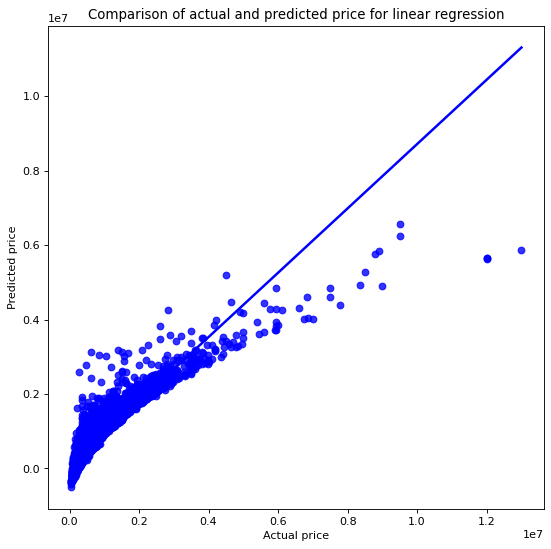

In [8]:
figure(figsize=(8, 8), dpi=80)
ax = sns.regplot(x=test_y, y=lin_reg_pred, ci=None, color ='blue')
ax.set(xlabel='Actual price', ylabel='Predicted price', title='Comparison of actual and predicted price for linear regression')
plt.show()

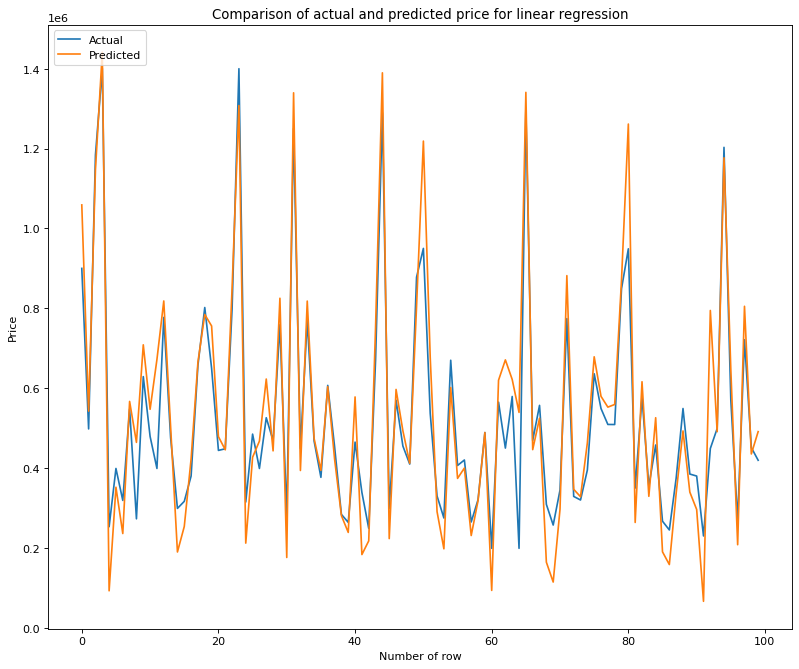

In [9]:
figure(figsize=(12, 10), dpi=80)
plt.plot(list(range(len(test_y[:100].values))), test_y[:100])
plt.plot(list(range(len(test_y[:100].values))), lin_reg_pred[:100])
plt.title('Comparison of actual and predicted price for linear regression')
plt.ylabel('Price')
plt.xlabel('Number of row')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

### XGBoost

In [10]:
xgb_r = xg.XGBRegressor(objective = 'reg:squarederror')

optimization_dict = {'max_depth': [2, 4, 6],
                     'n_estimators': [100, 500, 1000],
                    'seed': [4, 8, 16]}

mse = make_scorer(MSE,greater_is_better=False)

xgb_grid_search_model = GridSearchCV(xgb_r, optimization_dict, scoring=mse, verbose=10)

xgb_grid_search_model.fit(train_X, train_y)

print(xgb_grid_search_model.best_score_)
print(xgb_grid_search_model.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 1/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-3436000171.716 total time=   0.6s
[CV 2/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 2/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-3019015822.950 total time=   0.6s
[CV 3/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 3/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-2458661724.989 total time=   0.7s
[CV 4/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 4/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-2599304817.030 total time=   0.7s
[CV 5/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 5/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-2406631284.510 total time=   0.7s
[CV 1/5; 2/27] START max_depth=2,

[CV 1/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-1649693400.936 total time=   1.8s
[CV 2/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 2/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-1019860504.492 total time=   1.8s
[CV 3/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 3/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-1213140023.161 total time=   1.8s
[CV 4/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 4/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-640137094.973 total time=   1.8s
[CV 5/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 5/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-827551687.408 total time=   1.8s
[CV 1/5; 11/27] START max_depth=4, n_estimators=100, seed=8.....................
[CV 1/5; 11/27] END max_depth=4, n_estimators=100, seed=8;, score=-1649693400.936 total time

[CV 2/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-1071279371.492 total time=   2.2s
[CV 3/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 3/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-1186202976.990 total time=   2.3s
[CV 4/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 4/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-445864326.044 total time=   2.2s
[CV 5/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 5/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-459863106.656 total time=   2.2s
[CV 1/5; 20/27] START max_depth=6, n_estimators=100, seed=8.....................
[CV 1/5; 20/27] END max_depth=6, n_estimators=100, seed=8;, score=-1222502431.830 total time=   2.2s
[CV 2/5; 20/27] START max_depth=6, n_estimators=100, seed=8.....................
[CV 2/5; 20/27] END max_depth=6, n_estimators=100, seed=8;, score=-1071279371.492 total time

In [11]:
xgb_pred = xgb_grid_search_model.predict(test_X)

In [12]:
model_xgb = xgb_grid_search_model.best_estimator_
model_xgb.fit(train_X, train_y)
model_xgb.save_model("xgb_flats_model.save")

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=4,
             reg_alpha=0, reg_lambda=1, ...)

In [13]:
fig, ax = plt.subplots(figsize=(200, 200))
xg.plot_tree(model_xgb, num_trees=0, ax=ax, fontsize=20)

plt.savefig('xgb_tree.png')

#### Metrics for the XGBoost model

In [14]:
print(sqrt(MSE(test_y, xgb_pred)))
print(MAE(test_y, xgb_pred))
print(r2_score(test_y, xgb_pred))

19400.825680281105
4404.417550531282
0.998304239094341


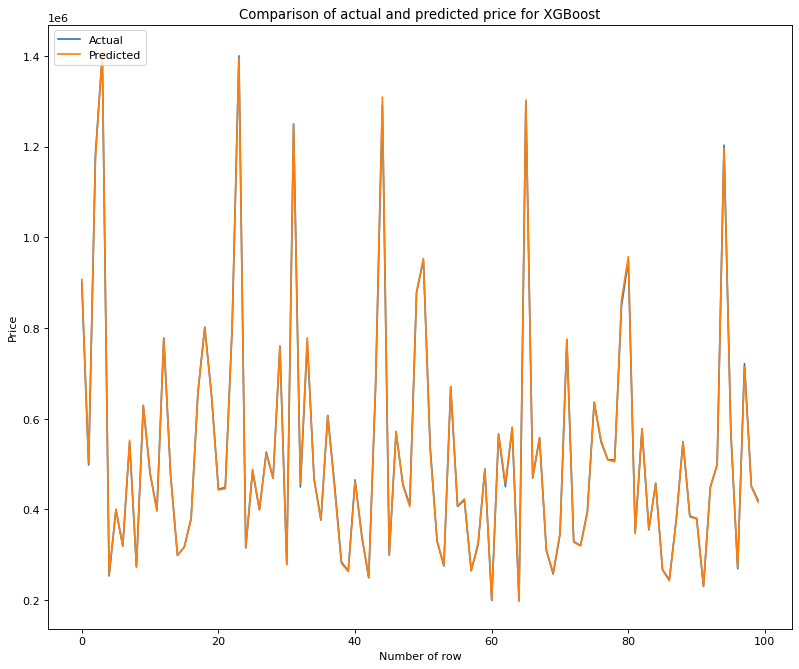

In [15]:
figure(figsize=(12, 10), dpi=80)
plt.plot(list(range(len(test_y[:100].values))), test_y[:100])
plt.plot(list(range(len(test_y[:100].values))), xgb_pred[:100])
plt.title('Comparison of actual and predicted price for XGBoost')
plt.ylabel('Price')
plt.xlabel('Number of row')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

### Neural networks

In [16]:
def create_model(learning_rate):

    nn_model = keras.Sequential(
        [
            layers.Dense(256, input_dim = len(data.columns) - 1, activation = 'relu'),
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'linear')
        ]
    )
    adam = tf.optimizers.Adam(learning_rate = learning_rate)
    nn_model.compile(loss = 'mse', optimizer = adam, metrics = ['mse', 'mae'])

    return nn_model

model = KerasRegressor(build_fn=create_model)

In [17]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

In [18]:
batch_size = [32, 64, 256]
epochs = [64, 128, 256]
learning_rate = [0.001, 0.01]
validation_split=[0.2]
callbacks=[earlystopping]

param_grid = dict(batch_size=batch_size, epochs=epochs, learning_rate = learning_rate, validation_split = validation_split, callbacks = callbacks)
nn_grid_search_model = GridSearchCV(estimator=model, param_grid=param_grid, verbose=10)
nn_grid_search_result = nn_grid_search_model.fit(train_X, train_y)

print(nn_grid_search_model.best_params_)
print(nn_grid_search_model.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=64, learning_rate=0.001, validation_split=0.2
Epoch 1/64


2022-11-15 12:22:49.704836: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1201/1201 [==============================] - 2s 1ms/step - loss: 161963425792.0000 - mse: 161963425792.0000 - mae: 206589.4062 - val_loss: 123218640896.0000 - val_mse: 123218640896.0000 - val_mae: 180307.8906
Epoch 2/64
1201/1201 [==============================] - 1s 1ms/step - loss: 141798965248.0000 - mse: 141798965248.0000 - mae: 191850.6562 - val_loss: 122714693632.0000 - val_mse: 122714693632.0000 - val_mae: 175816.6250
Epoch 3/64
1201/1201 [==============================] - 1s 1ms/step - loss: 141079953408.0000 - mse: 141079953408.0000 - mae: 190471.2656 - val_loss: 122338246656.0000 - val_mse: 122338246656.0000 - val_mae: 175532.3750
Epoch 4/64
1201/1201 [==============================] - 1s 1ms/step - loss: 141276839936.0000 - mse: 141276839936.0000 - mae: 190195.4219 - val_loss: 122206085120.0000 - val_mse: 122206085120.0000 - val_mae: 183309.0469
Epoch 5/64
1201/1201 [==============================] - 1s 1ms/step - loss: 140066324480.0000 - mse: 140066324480.0000 - mae: 18994

1201/1201 [==============================] - 1s 1ms/step - loss: 94600577024.0000 - mse: 94600577024.0000 - mae: 155434.8750 - val_loss: 74815799296.0000 - val_mse: 74815799296.0000 - val_mae: 116710.2109
Epoch 39/64
1201/1201 [==============================] - 1s 1ms/step - loss: 94441881600.0000 - mse: 94441881600.0000 - mae: 155844.1562 - val_loss: 75027759104.0000 - val_mse: 75027759104.0000 - val_mae: 117543.9609
Epoch 40/64
1201/1201 [==============================] - 1s 1ms/step - loss: 95844327424.0000 - mse: 95844327424.0000 - mae: 155606.9062 - val_loss: 95839584256.0000 - val_mse: 95839584256.0000 - val_mae: 202679.8125
Epoch 41/64
1201/1201 [==============================] - 1s 1ms/step - loss: 98927525888.0000 - mse: 98927525888.0000 - mae: 158217.4688 - val_loss: 71525851136.0000 - val_mse: 71525851136.0000 - val_mae: 118025.0781
Epoch 42/64
1201/1201 [==============================] - 1s 1ms/step - loss: 97963761664.0000 - mse: 97963761664.0000 - mae: 157354.4688 - val_l

1201/1201 [==============================] - 1s 1ms/step - loss: 145463918592.0000 - mse: 145463918592.0000 - mae: 190638.0312 - val_loss: 119924400128.0000 - val_mse: 119924400128.0000 - val_mae: 171418.3906
Epoch 10/64
1201/1201 [==============================] - 1s 1ms/step - loss: 146315608064.0000 - mse: 146315608064.0000 - mae: 191172.5156 - val_loss: 119127031808.0000 - val_mse: 119127031808.0000 - val_mae: 172407.1406
Epoch 11/64
1201/1201 [==============================] - 1s 1ms/step - loss: 144936452096.0000 - mse: 144936452096.0000 - mae: 189729.7656 - val_loss: 120778915840.0000 - val_mse: 120778915840.0000 - val_mae: 167399.2656
Epoch 12/64
1201/1201 [==============================] - 1s 1ms/step - loss: 143799992320.0000 - mse: 143799992320.0000 - mae: 189320.4688 - val_loss: 118053543936.0000 - val_mse: 118053543936.0000 - val_mae: 170740.5469
Epoch 13/64
1201/1201 [==============================] - 1s 1ms/step - loss: 143774433280.0000 - mse: 143774433280.0000 - mae: 1

1201/1201 [==============================] - 1s 1ms/step - loss: 113992318976.0000 - mse: 113992318976.0000 - mae: 167007.4062 - val_loss: 76671991808.0000 - val_mse: 76671991808.0000 - val_mae: 117769.7422
Epoch 47/64
1201/1201 [==============================] - 1s 1ms/step - loss: 110254522368.0000 - mse: 110254522368.0000 - mae: 166700.0625 - val_loss: 78137475072.0000 - val_mse: 78137475072.0000 - val_mae: 130901.2031
Epoch 48/64
1201/1201 [==============================] - 1s 1ms/step - loss: 110577205248.0000 - mse: 110577205248.0000 - mae: 166486.8281 - val_loss: 72808718336.0000 - val_mse: 72808718336.0000 - val_mae: 122261.4766
Epoch 49/64
1201/1201 [==============================] - 1s 1ms/step - loss: 110671896576.0000 - mse: 110671896576.0000 - mae: 166647.3906 - val_loss: 82855845888.0000 - val_mse: 82855845888.0000 - val_mae: 134810.8594
Epoch 50/64
1201/1201 [==============================] - 1s 1ms/step - loss: 105428492288.0000 - mse: 105428492288.0000 - mae: 165082.75

1201/1201 [==============================] - 1s 1ms/step - loss: 130206187520.0000 - mse: 130206187520.0000 - mae: 185458.1875 - val_loss: 111095201792.0000 - val_mse: 111095201792.0000 - val_mae: 166009.3281
Epoch 19/64
1201/1201 [==============================] - 1s 1ms/step - loss: 126653652992.0000 - mse: 126653652992.0000 - mae: 182936.4688 - val_loss: 112203481088.0000 - val_mse: 112203481088.0000 - val_mae: 180657.8125
Epoch 20/64
1201/1201 [==============================] - 1s 1ms/step - loss: 127300591616.0000 - mse: 127300591616.0000 - mae: 181683.9531 - val_loss: 110619189248.0000 - val_mse: 110619189248.0000 - val_mae: 157924.4688
Epoch 21/64
1201/1201 [==============================] - 2s 1ms/step - loss: 124211576832.0000 - mse: 124211576832.0000 - mae: 179379.8438 - val_loss: 105461260288.0000 - val_mse: 105461260288.0000 - val_mae: 159021.8125
Epoch 22/64
1201/1201 [==============================] - 1s 1ms/step - loss: 120733409280.0000 - mse: 120733409280.0000 - mae: 1

1201/1201 [==============================] - 1s 1ms/step - loss: 101872566272.0000 - mse: 101872566272.0000 - mae: 159672.0000 - val_loss: 116668932096.0000 - val_mse: 116668932096.0000 - val_mae: 176967.3438
Epoch 56/64
1201/1201 [==============================] - 1s 1ms/step - loss: 97824456704.0000 - mse: 97824456704.0000 - mae: 158622.0938 - val_loss: 75988205568.0000 - val_mse: 75988205568.0000 - val_mae: 122387.6328
Epoch 57/64
1201/1201 [==============================] - 1s 1ms/step - loss: 104819269632.0000 - mse: 104819269632.0000 - mae: 161873.1406 - val_loss: 68563820544.0000 - val_mse: 68563820544.0000 - val_mae: 128399.8516
Epoch 58/64
1201/1201 [==============================] - 1s 1ms/step - loss: 98589286400.0000 - mse: 98589286400.0000 - mae: 159539.1094 - val_loss: 86296215552.0000 - val_mse: 86296215552.0000 - val_mae: 142288.3438
Epoch 59/64
1201/1201 [==============================] - 1s 1ms/step - loss: 96105734144.0000 - mse: 96105734144.0000 - mae: 155423.7656 -

1201/1201 [==============================] - 1s 1ms/step - loss: 130425307136.0000 - mse: 130425307136.0000 - mae: 176715.7656 - val_loss: 99156918272.0000 - val_mse: 99156918272.0000 - val_mae: 163257.5156
Epoch 27/64
1201/1201 [==============================] - 1s 1ms/step - loss: 128639041536.0000 - mse: 128639041536.0000 - mae: 171698.9844 - val_loss: 92327837696.0000 - val_mse: 92327837696.0000 - val_mae: 134542.1406
Epoch 28/64
1201/1201 [==============================] - 1s 1ms/step - loss: 126667628544.0000 - mse: 126667628544.0000 - mae: 172312.1250 - val_loss: 87401152512.0000 - val_mse: 87401152512.0000 - val_mae: 142995.6406
Epoch 29/64
1201/1201 [==============================] - 1s 1ms/step - loss: 122022608896.0000 - mse: 122022608896.0000 - mae: 166942.2188 - val_loss: 82722791424.0000 - val_mse: 82722791424.0000 - val_mae: 132319.5625
Epoch 30/64
1201/1201 [==============================] - 1s 1ms/step - loss: 118060007424.0000 - mse: 118060007424.0000 - mae: 165384.68

1201/1201 [==============================] - 1s 1ms/step - loss: 108906848256.0000 - mse: 108906848256.0000 - mae: 162715.3594 - val_loss: 65854447616.0000 - val_mse: 65854447616.0000 - val_mae: 118116.0781
Epoch 64/64
376/376 [==============================] - 0s 573us/step - loss: 52870623232.0000 - mse: 52870623232.0000 - mae: 118167.3984
[CV 4/5; 1/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=64, learning_rate=0.001, validation_split=0.2;, score=-52870623232.000 total time= 1.5min
[CV 5/5; 1/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=64, learning_rate=0.001, validation_split=0.2
Epoch 1/64
1201/1201 [==============================] - 2s 1ms/step - loss: 177150787584.0000 - mse: 177150787584.0000 - mae: 213305.6562 - val_loss: 107501666304.0000 - val_mse: 107501666304.0000 - val_mae: 172336.7656
Epoch 2/64
1201/1201 [==============================] - 1s 1ms/step - loss: 1579

1201/1201 [==============================] - 1s 1ms/step - loss: 110340972544.0000 - mse: 110340972544.0000 - mae: 162005.9062 - val_loss: 155714797568.0000 - val_mse: 155714797568.0000 - val_mae: 265026.5000
Epoch 35/64
1201/1201 [==============================] - 1s 1ms/step - loss: 112091037696.0000 - mse: 112091037696.0000 - mae: 164263.5312 - val_loss: 73499107328.0000 - val_mse: 73499107328.0000 - val_mae: 154963.5938
Epoch 36/64
1201/1201 [==============================] - 1s 1ms/step - loss: 107604303872.0000 - mse: 107604303872.0000 - mae: 161967.5469 - val_loss: 70048014336.0000 - val_mse: 70048014336.0000 - val_mae: 138886.2344
Epoch 37/64
1201/1201 [==============================] - 1s 1ms/step - loss: 115312148480.0000 - mse: 115312148480.0000 - mae: 163065.6719 - val_loss: 72805433344.0000 - val_mse: 72805433344.0000 - val_mae: 149899.7188
Epoch 38/64
1201/1201 [==============================] - 1s 1ms/step - loss: 114977234944.0000 - mse: 114977234944.0000 - mae: 164412.

1201/1201 [==============================] - 1s 1ms/step - loss: 144522362880.0000 - mse: 144522362880.0000 - mae: 196895.1719 - val_loss: 116862189568.0000 - val_mse: 116862189568.0000 - val_mae: 191856.3125
Epoch 10/64
1201/1201 [==============================] - 1s 1ms/step - loss: 144228843520.0000 - mse: 144228843520.0000 - mae: 197178.6094 - val_loss: 107787206656.0000 - val_mse: 107787206656.0000 - val_mae: 155088.2656
Epoch 11/64
1201/1201 [==============================] - 1s 1ms/step - loss: 140260245504.0000 - mse: 140260245504.0000 - mae: 194328.8750 - val_loss: 119286325248.0000 - val_mse: 119286325248.0000 - val_mae: 171383.5156
Epoch 12/64
1201/1201 [==============================] - 1s 1ms/step - loss: 141276938240.0000 - mse: 141276938240.0000 - mae: 192894.7500 - val_loss: 126583611392.0000 - val_mse: 126583611392.0000 - val_mae: 163651.6719
Epoch 13/64
1201/1201 [==============================] - 1s 1ms/step - loss: 138954031104.0000 - mse: 138954031104.0000 - mae: 1

Epoch 24/64
1201/1201 [==============================] - 1s 1ms/step - loss: 177131569152.0000 - mse: 177131569152.0000 - mae: 213381.9375 - val_loss: 141419364352.0000 - val_mse: 141419364352.0000 - val_mae: 171575.0781
Epoch 25/64
1201/1201 [==============================] - 1s 1ms/step - loss: 169289072640.0000 - mse: 169289072640.0000 - mae: 203439.8281 - val_loss: 156242919424.0000 - val_mse: 156242919424.0000 - val_mae: 185007.2500
Epoch 26/64
1201/1201 [==============================] - 1s 1ms/step - loss: 163339206656.0000 - mse: 163339206656.0000 - mae: 199042.3750 - val_loss: 154818691072.0000 - val_mse: 154818691072.0000 - val_mae: 203796.2031
Epoch 27/64
1201/1201 [==============================] - 1s 1ms/step - loss: 162243641344.0000 - mse: 162243641344.0000 - mae: 196617.8438 - val_loss: 147918929920.0000 - val_mse: 147918929920.0000 - val_mae: 186104.2969
Epoch 28/64
1201/1201 [==============================] - 1s 1ms/step - loss: 159180636160.0000 - mse: 159180636160.0

Epoch 26/64
1201/1201 [==============================] - 1s 1ms/step - loss: 142967930880.0000 - mse: 142967930880.0000 - mae: 189478.0625 - val_loss: 98565636096.0000 - val_mse: 98565636096.0000 - val_mae: 135057.7031
Epoch 27/64
1201/1201 [==============================] - 1s 1ms/step - loss: 140604768256.0000 - mse: 140604768256.0000 - mae: 191626.4062 - val_loss: 112932110336.0000 - val_mse: 112932110336.0000 - val_mae: 139325.4375
Epoch 28/64
1201/1201 [==============================] - 1s 1ms/step - loss: 148918124544.0000 - mse: 148918124544.0000 - mae: 189883.2656 - val_loss: 122219937792.0000 - val_mse: 122219937792.0000 - val_mae: 159514.2344
Epoch 29/64
1201/1201 [==============================] - 1s 1ms/step - loss: 141644234752.0000 - mse: 141644234752.0000 - mae: 187457.2188 - val_loss: 94134460416.0000 - val_mse: 94134460416.0000 - val_mae: 131556.5625
Epoch 30/64
1201/1201 [==============================] - 1s 1ms/step - loss: 147016876032.0000 - mse: 147016876032.0000 

Epoch 15/64
1201/1201 [==============================] - 1s 1ms/step - loss: 155484553216.0000 - mse: 155484553216.0000 - mae: 198232.9688 - val_loss: 128193069056.0000 - val_mse: 128193069056.0000 - val_mae: 171872.3125
Epoch 16/64
1201/1201 [==============================] - 1s 1ms/step - loss: 155816673280.0000 - mse: 155816673280.0000 - mae: 195321.5625 - val_loss: 160444661760.0000 - val_mse: 160444661760.0000 - val_mae: 212374.1875
Epoch 17/64
1201/1201 [==============================] - 1s 1ms/step - loss: 149571256320.0000 - mse: 149571256320.0000 - mae: 195294.5938 - val_loss: 105212592128.0000 - val_mse: 105212592128.0000 - val_mae: 159564.4844
Epoch 18/64
1201/1201 [==============================] - 1s 1ms/step - loss: 150967025664.0000 - mse: 150967025664.0000 - mae: 194672.6094 - val_loss: 174786871296.0000 - val_mse: 174786871296.0000 - val_mae: 217275.2188
Epoch 19/64
1201/1201 [==============================] - 1s 1ms/step - loss: 147569704960.0000 - mse: 147569704960.0

Epoch 23/64
1201/1201 [==============================] - 1s 1ms/step - loss: 147977224192.0000 - mse: 147977224192.0000 - mae: 189856.9375 - val_loss: 128652214272.0000 - val_mse: 128652214272.0000 - val_mae: 190130.7188
Epoch 24/64
1201/1201 [==============================] - 1s 1ms/step - loss: 143050375168.0000 - mse: 143050375168.0000 - mae: 182869.6406 - val_loss: 86051905536.0000 - val_mse: 86051905536.0000 - val_mae: 139578.4219
Epoch 25/64
1201/1201 [==============================] - 1s 1ms/step - loss: 144131866624.0000 - mse: 144131866624.0000 - mae: 190930.6250 - val_loss: 91607924736.0000 - val_mse: 91607924736.0000 - val_mae: 142206.5781
Epoch 26/64
1201/1201 [==============================] - 1s 1ms/step - loss: 147571933184.0000 - mse: 147571933184.0000 - mae: 192447.0469 - val_loss: 80641015808.0000 - val_mse: 80641015808.0000 - val_mae: 135792.4375
Epoch 27/64
1201/1201 [==============================] - 1s 1ms/step - loss: 142417788928.0000 - mse: 142417788928.0000 - 

Epoch 18/128
1201/1201 [==============================] - 1s 1ms/step - loss: 132853604352.0000 - mse: 132853604352.0000 - mae: 184930.7031 - val_loss: 112145629184.0000 - val_mse: 112145629184.0000 - val_mae: 165178.0469
Epoch 19/128
1201/1201 [==============================] - 1s 1ms/step - loss: 131598106624.0000 - mse: 131598106624.0000 - mae: 184637.9844 - val_loss: 110431911936.0000 - val_mse: 110431911936.0000 - val_mae: 165384.6719
Epoch 20/128
1201/1201 [==============================] - 1s 1ms/step - loss: 127578562560.0000 - mse: 127578562560.0000 - mae: 182155.9531 - val_loss: 115598950400.0000 - val_mse: 115598950400.0000 - val_mae: 161999.3906
Epoch 21/128
1201/1201 [==============================] - 1s 1ms/step - loss: 128418136064.0000 - mse: 128418136064.0000 - mae: 181888.1250 - val_loss: 116729544704.0000 - val_mse: 116729544704.0000 - val_mae: 164353.7344
Epoch 22/128
1201/1201 [==============================] - 1s 1ms/step - loss: 125277282304.0000 - mse: 125277282

1201/1201 [==============================] - 3s 2ms/step - loss: 102460727296.0000 - mse: 102460727296.0000 - mae: 161501.1094 - val_loss: 75889819648.0000 - val_mse: 75889819648.0000 - val_mae: 117777.2188
Epoch 56/128
1201/1201 [==============================] - 3s 2ms/step - loss: 94628036608.0000 - mse: 94628036608.0000 - mae: 156644.4688 - val_loss: 92864749568.0000 - val_mse: 92864749568.0000 - val_mae: 145253.9219
Epoch 57/128
1201/1201 [==============================] - 3s 2ms/step - loss: 93533315072.0000 - mse: 93533315072.0000 - mae: 155844.5312 - val_loss: 77891829760.0000 - val_mse: 77891829760.0000 - val_mae: 150407.1406
Epoch 58/128
1201/1201 [==============================] - 3s 2ms/step - loss: 99378397184.0000 - mse: 99378397184.0000 - mae: 159023.7188 - val_loss: 64337559552.0000 - val_mse: 64337559552.0000 - val_mae: 114388.9297
Epoch 59/128
1201/1201 [==============================] - 3s 2ms/step - loss: 96888250368.0000 - mse: 96888250368.0000 - mae: 158049.4062 -

1201/1201 [==============================] - 3s 2ms/step - loss: 131774472192.0000 - mse: 131774472192.0000 - mae: 181911.2812 - val_loss: 110705156096.0000 - val_mse: 110705156096.0000 - val_mae: 162187.0312
Epoch 23/128
1201/1201 [==============================] - 3s 2ms/step - loss: 130620850176.0000 - mse: 130620850176.0000 - mae: 180008.0625 - val_loss: 102597386240.0000 - val_mse: 102597386240.0000 - val_mae: 152153.2031
Epoch 24/128
1201/1201 [==============================] - 3s 2ms/step - loss: 124999131136.0000 - mse: 124999131136.0000 - mae: 174702.6250 - val_loss: 102713704448.0000 - val_mse: 102713704448.0000 - val_mae: 177340.6562
Epoch 25/128
1201/1201 [==============================] - 3s 2ms/step - loss: 120816123904.0000 - mse: 120816123904.0000 - mae: 171378.3594 - val_loss: 94297939968.0000 - val_mse: 94297939968.0000 - val_mae: 142982.5938
Epoch 26/128
1201/1201 [==============================] - 3s 2ms/step - loss: 121151078400.0000 - mse: 121151078400.0000 - mae:

1201/1201 [==============================] - 3s 2ms/step - loss: 106952499200.0000 - mse: 106952499200.0000 - mae: 158230.4531 - val_loss: 133385904128.0000 - val_mse: 133385904128.0000 - val_mae: 146214.0312
Epoch 60/128
1201/1201 [==============================] - 3s 2ms/step - loss: 112956162048.0000 - mse: 112956162048.0000 - mae: 161160.1875 - val_loss: 127296028672.0000 - val_mse: 127296028672.0000 - val_mae: 169119.1094
Epoch 61/128
376/376 [==============================] - 0s 1ms/step - loss: 77547110400.0000 - mse: 77547110400.0000 - mae: 125272.6328
[CV 2/5; 3/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.001, validation_split=0.2;, score=-77547110400.000 total time= 2.6min
[CV 3/5; 3/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.001, validation_split=0.2
Epoch 1/128
1201/1201 [==============================] - 3s 2ms/step - loss

Epoch 33/128
1201/1201 [==============================] - 1s 1ms/step - loss: 106500661248.0000 - mse: 106500661248.0000 - mae: 160114.7031 - val_loss: 81854439424.0000 - val_mse: 81854439424.0000 - val_mae: 135730.9844
Epoch 34/128
1201/1201 [==============================] - 1s 1ms/step - loss: 101764841472.0000 - mse: 101764841472.0000 - mae: 157199.7656 - val_loss: 80109150208.0000 - val_mse: 80109150208.0000 - val_mae: 135419.7812
Epoch 35/128
1201/1201 [==============================] - 1s 1ms/step - loss: 104945180672.0000 - mse: 104945180672.0000 - mae: 160546.6250 - val_loss: 81846337536.0000 - val_mse: 81846337536.0000 - val_mae: 147262.0938
Epoch 36/128
1201/1201 [==============================] - 1s 1ms/step - loss: 102194348032.0000 - mse: 102194348032.0000 - mae: 160764.6406 - val_loss: 79292563456.0000 - val_mse: 79292563456.0000 - val_mae: 123644.0703
Epoch 37/128
1201/1201 [==============================] - 2s 1ms/step - loss: 100034969600.0000 - mse: 100034969600.0000

1201/1201 [==============================] - 1s 1ms/step - loss: 154301153280.0000 - mse: 154301153280.0000 - mae: 193631.7656 - val_loss: 120819712000.0000 - val_mse: 120819712000.0000 - val_mae: 171365.4375
Epoch 9/128
1201/1201 [==============================] - 1s 1ms/step - loss: 159295504384.0000 - mse: 159295504384.0000 - mae: 193983.4375 - val_loss: 120068694016.0000 - val_mse: 120068694016.0000 - val_mae: 181426.0000
Epoch 10/128
1201/1201 [==============================] - 1s 1ms/step - loss: 155984789504.0000 - mse: 155984789504.0000 - mae: 193979.2812 - val_loss: 119425515520.0000 - val_mse: 119425515520.0000 - val_mae: 170771.0938
Epoch 11/128
1201/1201 [==============================] - 1s 1ms/step - loss: 156120596480.0000 - mse: 156120596480.0000 - mae: 193955.0469 - val_loss: 119176044544.0000 - val_mse: 119176044544.0000 - val_mae: 172033.9219
Epoch 12/128
1201/1201 [==============================] - 2s 1ms/step - loss: 152622366720.0000 - mse: 152622366720.0000 - mae

1201/1201 [==============================] - 1s 1ms/step - loss: 113521262592.0000 - mse: 113521262592.0000 - mae: 162578.8281 - val_loss: 76022669312.0000 - val_mse: 76022669312.0000 - val_mae: 142418.3906
Epoch 46/128
1201/1201 [==============================] - 1s 1ms/step - loss: 117175902208.0000 - mse: 117175902208.0000 - mae: 166368.7031 - val_loss: 69124325376.0000 - val_mse: 69124325376.0000 - val_mae: 125859.9453
Epoch 47/128
1201/1201 [==============================] - 1s 1ms/step - loss: 114391326720.0000 - mse: 114391326720.0000 - mae: 165031.1719 - val_loss: 94182916096.0000 - val_mse: 94182916096.0000 - val_mae: 141494.6250
Epoch 48/128
1201/1201 [==============================] - 2s 1ms/step - loss: 118661677056.0000 - mse: 118661677056.0000 - mae: 167500.4375 - val_loss: 73677529088.0000 - val_mse: 73677529088.0000 - val_mae: 129753.5469
Epoch 49/128
1201/1201 [==============================] - 1s 1ms/step - loss: 107724185600.0000 - mse: 107724185600.0000 - mae: 16105

Epoch 24/128
1201/1201 [==============================] - 1s 1ms/step - loss: 131012173824.0000 - mse: 131012173824.0000 - mae: 175859.1094 - val_loss: 81253638144.0000 - val_mse: 81253638144.0000 - val_mae: 144864.8438
Epoch 25/128
1201/1201 [==============================] - 1s 1ms/step - loss: 124717441024.0000 - mse: 124717441024.0000 - mae: 172016.8906 - val_loss: 78486355968.0000 - val_mse: 78486355968.0000 - val_mae: 147591.5469
Epoch 26/128
1201/1201 [==============================] - 1s 1ms/step - loss: 125166731264.0000 - mse: 125166731264.0000 - mae: 168954.6094 - val_loss: 74546601984.0000 - val_mse: 74546601984.0000 - val_mae: 132189.2031
Epoch 27/128
1201/1201 [==============================] - 1s 1ms/step - loss: 123044397056.0000 - mse: 123044397056.0000 - mae: 167146.9375 - val_loss: 71437197312.0000 - val_mse: 71437197312.0000 - val_mae: 132414.5625
Epoch 28/128
1201/1201 [==============================] - 1s 1ms/step - loss: 119010041856.0000 - mse: 119010041856.0000

1201/1201 [==============================] - 1s 1ms/step - loss: 111665733632.0000 - mse: 111665733632.0000 - mae: 164960.2500 - val_loss: 82320203776.0000 - val_mse: 82320203776.0000 - val_mae: 146393.1250
Epoch 62/128
1201/1201 [==============================] - 1s 1ms/step - loss: 111075868672.0000 - mse: 111075868672.0000 - mae: 161734.5781 - val_loss: 60005990400.0000 - val_mse: 60005990400.0000 - val_mae: 113678.7969
Epoch 63/128
376/376 [==============================] - 0s 618us/step - loss: 64831987712.0000 - mse: 64831987712.0000 - mae: 119619.0469
[CV 5/5; 3/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.001, validation_split=0.2;, score=-64831987712.000 total time= 1.5min
[CV 1/5; 4/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.01, validation_split=0.2
Epoch 1/128
1201/1201 [==============================] - 2s 1ms/step - loss: 1

Epoch 8/128
1201/1201 [==============================] - 1s 1ms/step - loss: 159282610176.0000 - mse: 159282610176.0000 - mae: 204173.1719 - val_loss: 117696897024.0000 - val_mse: 117696897024.0000 - val_mae: 162713.4844
Epoch 9/128
1201/1201 [==============================] - 1s 1ms/step - loss: 152769888256.0000 - mse: 152769888256.0000 - mae: 199964.5938 - val_loss: 119758635008.0000 - val_mse: 119758635008.0000 - val_mae: 161946.1250
Epoch 10/128
1201/1201 [==============================] - 1s 1ms/step - loss: 151556636672.0000 - mse: 151556636672.0000 - mae: 198874.5312 - val_loss: 113202896896.0000 - val_mse: 113202896896.0000 - val_mae: 156743.9062
Epoch 11/128
1201/1201 [==============================] - 1s 1ms/step - loss: 149258338304.0000 - mse: 149258338304.0000 - mae: 197009.0781 - val_loss: 111914926080.0000 - val_mse: 111914926080.0000 - val_mae: 159770.1719
Epoch 12/128
1201/1201 [==============================] - 1s 1ms/step - loss: 149758885888.0000 - mse: 14975888588

Epoch 13/128
1201/1201 [==============================] - 1s 1ms/step - loss: 138734534656.0000 - mse: 138734534656.0000 - mae: 192865.7500 - val_loss: 110541471744.0000 - val_mse: 110541471744.0000 - val_mae: 157822.6875
Epoch 14/128
1201/1201 [==============================] - 1s 1ms/step - loss: 138247831552.0000 - mse: 138247831552.0000 - mae: 192512.2812 - val_loss: 127317639168.0000 - val_mse: 127317639168.0000 - val_mae: 166654.3438
Epoch 15/128
1201/1201 [==============================] - 1s 1ms/step - loss: 138057154560.0000 - mse: 138057154560.0000 - mae: 189900.8750 - val_loss: 140107431936.0000 - val_mse: 140107431936.0000 - val_mae: 178558.6094
Epoch 16/128
1201/1201 [==============================] - 1s 1ms/step - loss: 139570774016.0000 - mse: 139570774016.0000 - mae: 190682.6406 - val_loss: 132674101248.0000 - val_mse: 132674101248.0000 - val_mae: 170757.5781
Epoch 17/128
1201/1201 [==============================] - 1s 1ms/step - loss: 134561619968.0000 - mse: 134561619

Epoch 19/128
1201/1201 [==============================] - 1s 1ms/step - loss: 141248610304.0000 - mse: 141248610304.0000 - mae: 183734.8281 - val_loss: 146961874944.0000 - val_mse: 146961874944.0000 - val_mae: 197717.1250
Epoch 20/128
1201/1201 [==============================] - 1s 1ms/step - loss: 151565811712.0000 - mse: 151565811712.0000 - mae: 189674.7812 - val_loss: 127272968192.0000 - val_mse: 127272968192.0000 - val_mae: 163487.6250
Epoch 21/128
1201/1201 [==============================] - 1s 1ms/step - loss: 149607350272.0000 - mse: 149607350272.0000 - mae: 188520.4531 - val_loss: 158658150400.0000 - val_mse: 158658150400.0000 - val_mae: 210114.1875
Epoch 22/128
1201/1201 [==============================] - 1s 1ms/step - loss: 160942800896.0000 - mse: 160942800896.0000 - mae: 200041.7656 - val_loss: 137155796992.0000 - val_mse: 137155796992.0000 - val_mae: 166107.4844
Epoch 23/128
1201/1201 [==============================] - 1s 1ms/step - loss: 160904118272.0000 - mse: 160904118

Epoch 1/128
1201/1201 [==============================] - 2s 1ms/step - loss: 170976198656.0000 - mse: 170976198656.0000 - mae: 210203.2188 - val_loss: 106472611840.0000 - val_mse: 106472611840.0000 - val_mae: 178952.0469
Epoch 2/128
1201/1201 [==============================] - 1s 1ms/step - loss: 170820845568.0000 - mse: 170820845568.0000 - mae: 211207.5469 - val_loss: 136723030016.0000 - val_mse: 136723030016.0000 - val_mae: 252579.4688
Epoch 3/128
1201/1201 [==============================] - 1s 1ms/step - loss: 170716250112.0000 - mse: 170716250112.0000 - mae: 208984.8594 - val_loss: 108012429312.0000 - val_mse: 108012429312.0000 - val_mae: 169121.5156
Epoch 4/128
1201/1201 [==============================] - 1s 1ms/step - loss: 170503618560.0000 - mse: 170503618560.0000 - mae: 209773.1719 - val_loss: 103487741952.0000 - val_mse: 103487741952.0000 - val_mae: 171076.6562
Epoch 5/128
1201/1201 [==============================] - 2s 1ms/step - loss: 164950360064.0000 - mse: 164950360064.0

Epoch 5/256
1201/1201 [==============================] - 1s 1ms/step - loss: 142082080768.0000 - mse: 142082080768.0000 - mae: 190778.7812 - val_loss: 126714740736.0000 - val_mse: 126714740736.0000 - val_mae: 169005.7812
Epoch 6/256
1201/1201 [==============================] - 1s 1ms/step - loss: 140774211584.0000 - mse: 140774211584.0000 - mae: 189536.0625 - val_loss: 121935331328.0000 - val_mse: 121935331328.0000 - val_mae: 169681.5312
Epoch 7/256
1201/1201 [==============================] - 1s 1ms/step - loss: 138156408832.0000 - mse: 138156408832.0000 - mae: 189192.9375 - val_loss: 130317418496.0000 - val_mse: 130317418496.0000 - val_mae: 213271.7344
Epoch 8/256
1201/1201 [==============================] - 1s 1ms/step - loss: 138258071552.0000 - mse: 138258071552.0000 - mae: 190448.8594 - val_loss: 122808107008.0000 - val_mse: 122808107008.0000 - val_mae: 166655.2500
Epoch 9/256
1201/1201 [==============================] - 1s 1ms/step - loss: 138298228736.0000 - mse: 138298228736.0

1201/1201 [==============================] - 1s 1ms/step - loss: 96174579712.0000 - mse: 96174579712.0000 - mae: 157022.2969 - val_loss: 87581622272.0000 - val_mse: 87581622272.0000 - val_mae: 117111.5078
Epoch 43/256
1201/1201 [==============================] - 1s 1ms/step - loss: 94564925440.0000 - mse: 94564925440.0000 - mae: 156232.9062 - val_loss: 83057983488.0000 - val_mse: 83057983488.0000 - val_mae: 138805.1250
Epoch 44/256
1201/1201 [==============================] - 1s 1ms/step - loss: 95610478592.0000 - mse: 95610478592.0000 - mae: 156779.0625 - val_loss: 65648103424.0000 - val_mse: 65648103424.0000 - val_mae: 117617.7812
Epoch 45/256
1201/1201 [==============================] - 1s 1ms/step - loss: 99387539456.0000 - mse: 99387539456.0000 - mae: 160022.2344 - val_loss: 71991345152.0000 - val_mse: 71991345152.0000 - val_mae: 116876.8906
Epoch 46/256
1201/1201 [==============================] - 1s 1ms/step - loss: 99572072448.0000 - mse: 99572072448.0000 - mae: 159118.4219 - v

1201/1201 [==============================] - 1s 1ms/step - loss: 132230856704.0000 - mse: 132230856704.0000 - mae: 181811.0938 - val_loss: 104562417664.0000 - val_mse: 104562417664.0000 - val_mae: 155608.8438
Epoch 24/256
1201/1201 [==============================] - 1s 1ms/step - loss: 130012176384.0000 - mse: 130012176384.0000 - mae: 179947.8906 - val_loss: 102529720320.0000 - val_mse: 102529720320.0000 - val_mae: 160461.1094
Epoch 25/256
1201/1201 [==============================] - 1s 1ms/step - loss: 126862245888.0000 - mse: 126862245888.0000 - mae: 177263.2656 - val_loss: 103574880256.0000 - val_mse: 103574880256.0000 - val_mae: 148097.2188
Epoch 26/256
1201/1201 [==============================] - 1s 1ms/step - loss: 123174035456.0000 - mse: 123174035456.0000 - mae: 173053.3438 - val_loss: 91637874688.0000 - val_mse: 91637874688.0000 - val_mae: 140622.2969
Epoch 27/256
1201/1201 [==============================] - 1s 1ms/step - loss: 115751223296.0000 - mse: 115751223296.0000 - mae:

1201/1201 [==============================] - 1s 1ms/step - loss: 135389487104.0000 - mse: 135389487104.0000 - mae: 187305.4844 - val_loss: 121442738176.0000 - val_mse: 121442738176.0000 - val_mae: 189325.1094
Epoch 11/256
1201/1201 [==============================] - 1s 1ms/step - loss: 136170913792.0000 - mse: 136170913792.0000 - mae: 188071.8438 - val_loss: 118525657088.0000 - val_mse: 118525657088.0000 - val_mae: 173215.3594
Epoch 12/256
1201/1201 [==============================] - 1s 1ms/step - loss: 135516315648.0000 - mse: 135516315648.0000 - mae: 186606.1250 - val_loss: 121457008640.0000 - val_mse: 121457008640.0000 - val_mae: 165305.4688
Epoch 13/256
1201/1201 [==============================] - 1s 1ms/step - loss: 135408836608.0000 - mse: 135408836608.0000 - mae: 186501.2188 - val_loss: 120232853504.0000 - val_mse: 120232853504.0000 - val_mae: 189015.4844
Epoch 14/256
1201/1201 [==============================] - 1s 1ms/step - loss: 133480816640.0000 - mse: 133480816640.0000 - ma

1201/1201 [==============================] - 1s 1ms/step - loss: 97407860736.0000 - mse: 97407860736.0000 - mae: 155609.5781 - val_loss: 79923634176.0000 - val_mse: 79923634176.0000 - val_mae: 137484.8438
Epoch 48/256
1201/1201 [==============================] - 1s 1ms/step - loss: 97420828672.0000 - mse: 97420828672.0000 - mae: 158005.1406 - val_loss: 116104167424.0000 - val_mse: 116104167424.0000 - val_mae: 158228.9062
Epoch 49/256
1201/1201 [==============================] - 1s 1ms/step - loss: 102578118656.0000 - mse: 102578118656.0000 - mae: 158315.7500 - val_loss: 82533744640.0000 - val_mse: 82533744640.0000 - val_mae: 119368.9219
Epoch 50/256
1201/1201 [==============================] - 1s 1ms/step - loss: 99313704960.0000 - mse: 99313704960.0000 - mae: 156402.4531 - val_loss: 85302452224.0000 - val_mse: 85302452224.0000 - val_mae: 127739.7578
Epoch 51/256
1201/1201 [==============================] - 1s 1ms/step - loss: 101432385536.0000 - mse: 101432385536.0000 - mae: 159233.45

Epoch 28/256
1201/1201 [==============================] - 1s 1ms/step - loss: 115705495552.0000 - mse: 115705495552.0000 - mae: 164356.5938 - val_loss: 87965868032.0000 - val_mse: 87965868032.0000 - val_mae: 124697.1250
Epoch 29/256
1201/1201 [==============================] - 1s 1ms/step - loss: 118367535104.0000 - mse: 118367535104.0000 - mae: 166645.0156 - val_loss: 98220933120.0000 - val_mse: 98220933120.0000 - val_mae: 162487.2031
Epoch 30/256
1201/1201 [==============================] - 1s 1ms/step - loss: 116523778048.0000 - mse: 116523778048.0000 - mae: 164525.7969 - val_loss: 83455680512.0000 - val_mse: 83455680512.0000 - val_mae: 155082.7031
Epoch 31/256
1201/1201 [==============================] - 1s 1ms/step - loss: 116404617216.0000 - mse: 116404617216.0000 - mae: 165240.4062 - val_loss: 91605663744.0000 - val_mse: 91605663744.0000 - val_mae: 149870.5625
Epoch 32/256
1201/1201 [==============================] - 1s 1ms/step - loss: 114431770624.0000 - mse: 114431770624.0000

Epoch 16/256
1201/1201 [==============================] - 1s 1ms/step - loss: 147764822016.0000 - mse: 147764822016.0000 - mae: 188491.2812 - val_loss: 98426617856.0000 - val_mse: 98426617856.0000 - val_mae: 167147.6250
Epoch 17/256
1201/1201 [==============================] - 1s 1ms/step - loss: 148843315200.0000 - mse: 148843315200.0000 - mae: 187980.1094 - val_loss: 97180385280.0000 - val_mse: 97180385280.0000 - val_mae: 164113.6406
Epoch 18/256
1201/1201 [==============================] - 1s 1ms/step - loss: 144929488896.0000 - mse: 144929488896.0000 - mae: 186937.4688 - val_loss: 95379652608.0000 - val_mse: 95379652608.0000 - val_mae: 161551.3281
Epoch 19/256
1201/1201 [==============================] - 1s 1ms/step - loss: 142593458176.0000 - mse: 142593458176.0000 - mae: 186218.8750 - val_loss: 97849352192.0000 - val_mse: 97849352192.0000 - val_mae: 159292.1562
Epoch 20/256
1201/1201 [==============================] - 1s 1ms/step - loss: 139825004544.0000 - mse: 139825004544.0000

1201/1201 [==============================] - 1s 1ms/step - loss: 112708001792.0000 - mse: 112708001792.0000 - mae: 162654.0000 - val_loss: 66426851328.0000 - val_mse: 66426851328.0000 - val_mae: 130781.1875
Epoch 54/256
1201/1201 [==============================] - 1s 1ms/step - loss: 115994435584.0000 - mse: 115994435584.0000 - mae: 163345.3906 - val_loss: 79416172544.0000 - val_mse: 79416172544.0000 - val_mae: 128963.6328
Epoch 55/256
376/376 [==============================] - 0s 587us/step - loss: 68213170176.0000 - mse: 68213170176.0000 - mae: 118882.0625
[CV 5/5; 5/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.001, validation_split=0.2;, score=-68213170176.000 total time= 1.3min
[CV 1/5; 6/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2
Epoch 1/256
1201/1201 [==============================] - 2s 1ms/step - loss: 1

Epoch 1/256
1201/1201 [==============================] - 2s 1ms/step - loss: 164251353088.0000 - mse: 164251353088.0000 - mae: 207470.6406 - val_loss: 134808043520.0000 - val_mse: 134808043520.0000 - val_mae: 224097.3281
Epoch 2/256
1201/1201 [==============================] - 1s 1ms/step - loss: 161734901760.0000 - mse: 161734901760.0000 - mae: 205765.0469 - val_loss: 121316679680.0000 - val_mse: 121316679680.0000 - val_mae: 172757.6094
Epoch 3/256
1201/1201 [==============================] - 1s 1ms/step - loss: 161749352448.0000 - mse: 161749352448.0000 - mae: 205441.5312 - val_loss: 123970371584.0000 - val_mse: 123970371584.0000 - val_mae: 165900.1562
Epoch 4/256
1201/1201 [==============================] - 1s 1ms/step - loss: 161284177920.0000 - mse: 161284177920.0000 - mae: 206877.5312 - val_loss: 118274416640.0000 - val_mse: 118274416640.0000 - val_mae: 170900.9531
Epoch 5/256
1201/1201 [==============================] - 1s 1ms/step - loss: 158050451456.0000 - mse: 158050451456.0

Epoch 3/256
1201/1201 [==============================] - 1s 1ms/step - loss: 152139186176.0000 - mse: 152139186176.0000 - mae: 203818.6094 - val_loss: 122231578624.0000 - val_mse: 122231578624.0000 - val_mae: 191046.3438
Epoch 4/256
1201/1201 [==============================] - 1s 1ms/step - loss: 148542701568.0000 - mse: 148542701568.0000 - mae: 200217.8125 - val_loss: 118819700736.0000 - val_mse: 118819700736.0000 - val_mae: 175579.2969
Epoch 5/256
1201/1201 [==============================] - 1s 1ms/step - loss: 148615233536.0000 - mse: 148615233536.0000 - mae: 202755.7812 - val_loss: 148439597056.0000 - val_mse: 148439597056.0000 - val_mae: 252104.0781
Epoch 6/256
1201/1201 [==============================] - 1s 1ms/step - loss: 146768773120.0000 - mse: 146768773120.0000 - mae: 200622.0938 - val_loss: 118259728384.0000 - val_mse: 118259728384.0000 - val_mae: 162580.5625
Epoch 7/256
1201/1201 [==============================] - 1s 1ms/step - loss: 150001958912.0000 - mse: 150001958912.0

376/376 [==============================] - 0s 596us/step - loss: 126894522368.0000 - mse: 126894522368.0000 - mae: 150365.2344
[CV 3/5; 6/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-126894522368.000 total time=  57.0s
[CV 4/5; 6/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2
Epoch 1/256
1201/1201 [==============================] - 2s 1ms/step - loss: 173876838400.0000 - mse: 173876838400.0000 - mae: 211876.5781 - val_loss: 170851057664.0000 - val_mse: 170851057664.0000 - val_mae: 287004.0000
Epoch 2/256
1201/1201 [==============================] - 1s 1ms/step - loss: 172932677632.0000 - mse: 172932677632.0000 - mae: 211817.9688 - val_loss: 143102820352.0000 - val_mse: 143102820352.0000 - val_mae: 191882.7031
Epoch 3/256
1201/1201 [==============================] - 1s 1ms/step - los

Epoch 36/256
376/376 [==============================] - 0s 569us/step - loss: 88689704960.0000 - mse: 88689704960.0000 - mae: 153343.7188
[CV 4/5; 6/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-88689704960.000 total time=  52.4s
[CV 5/5; 6/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2
Epoch 1/256
1201/1201 [==============================] - 2s 1ms/step - loss: 174369669120.0000 - mse: 174369669120.0000 - mae: 213640.5469 - val_loss: 118240829440.0000 - val_mse: 118240829440.0000 - val_mae: 213652.3281
Epoch 2/256
1201/1201 [==============================] - 1s 1ms/step - loss: 170730799104.0000 - mse: 170730799104.0000 - mae: 210385.4062 - val_loss: 110098857984.0000 - val_mse: 110098857984.0000 - val_mae: 168025.5625
Epoch 3/256
1201/1201 [==============================] - 2s 1ms/

376/376 [==============================] - 0s 617us/step - loss: 96308027392.0000 - mse: 96308027392.0000 - mae: 156009.7031
[CV 5/5; 6/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-96308027392.000 total time=  49.9s
[CV 1/5; 7/18] START batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=64, learning_rate=0.001, validation_split=0.2
Epoch 1/64
601/601 [==============================] - 1s 2ms/step - loss: 178699141120.0000 - mse: 178699141120.0000 - mae: 223231.3594 - val_loss: 124251176960.0000 - val_mse: 124251176960.0000 - val_mae: 171610.1875
Epoch 2/64
601/601 [==============================] - 1s 1ms/step - loss: 141652328448.0000 - mse: 141652328448.0000 - mae: 191284.7031 - val_loss: 122859036672.0000 - val_mse: 122859036672.0000 - val_mae: 181971.5156
Epoch 3/64
601/601 [==============================] - 1s 1ms/step - loss: 141247610

601/601 [==============================] - 1s 1ms/step - loss: 97767948288.0000 - mse: 97767948288.0000 - mae: 156908.3594 - val_loss: 79692963840.0000 - val_mse: 79692963840.0000 - val_mae: 143232.5000
Epoch 37/64
601/601 [==============================] - 1s 1ms/step - loss: 98939240448.0000 - mse: 98939240448.0000 - mae: 156987.7500 - val_loss: 76365979648.0000 - val_mse: 76365979648.0000 - val_mae: 129032.1328
Epoch 38/64
601/601 [==============================] - 1s 1ms/step - loss: 100633231360.0000 - mse: 100633231360.0000 - mae: 160194.1719 - val_loss: 78294286336.0000 - val_mse: 78294286336.0000 - val_mae: 132563.6250
Epoch 39/64
601/601 [==============================] - 1s 1ms/step - loss: 98251112448.0000 - mse: 98251112448.0000 - mae: 157607.2031 - val_loss: 82143551488.0000 - val_mse: 82143551488.0000 - val_mae: 123439.6641
Epoch 40/64
601/601 [==============================] - 1s 1ms/step - loss: 97295966208.0000 - mse: 97295966208.0000 - mae: 155411.3125 - val_loss: 103

Epoch 8/64
601/601 [==============================] - 1s 1ms/step - loss: 148648673280.0000 - mse: 148648673280.0000 - mae: 192975.1406 - val_loss: 121265586176.0000 - val_mse: 121265586176.0000 - val_mae: 175810.5000
Epoch 9/64
601/601 [==============================] - 1s 1ms/step - loss: 147566968832.0000 - mse: 147566968832.0000 - mae: 190387.5781 - val_loss: 121679839232.0000 - val_mse: 121679839232.0000 - val_mae: 184838.9688
Epoch 10/64
601/601 [==============================] - 1s 1ms/step - loss: 148686897152.0000 - mse: 148686897152.0000 - mae: 191195.6562 - val_loss: 122488414208.0000 - val_mse: 122488414208.0000 - val_mae: 168048.8906
Epoch 11/64
601/601 [==============================] - 1s 1ms/step - loss: 147970408448.0000 - mse: 147970408448.0000 - mae: 190077.6250 - val_loss: 121891307520.0000 - val_mse: 121891307520.0000 - val_mae: 171244.3281
Epoch 12/64
601/601 [==============================] - 1s 1ms/step - loss: 146200346624.0000 - mse: 146200346624.0000 - mae: 1

601/601 [==============================] - 1s 1ms/step - loss: 104574664704.0000 - mse: 104574664704.0000 - mae: 158716.3438 - val_loss: 96456040448.0000 - val_mse: 96456040448.0000 - val_mae: 124084.5156
Epoch 46/64
601/601 [==============================] - 1s 1ms/step - loss: 106683899904.0000 - mse: 106683899904.0000 - mae: 158695.1094 - val_loss: 104830992384.0000 - val_mse: 104830992384.0000 - val_mae: 138466.2031
Epoch 47/64
601/601 [==============================] - 1s 1ms/step - loss: 99341869056.0000 - mse: 99341869056.0000 - mae: 155154.6562 - val_loss: 74672750592.0000 - val_mse: 74672750592.0000 - val_mae: 121576.5703
Epoch 48/64
601/601 [==============================] - 1s 1ms/step - loss: 100771643392.0000 - mse: 100771643392.0000 - mae: 159712.2344 - val_loss: 73201524736.0000 - val_mse: 73201524736.0000 - val_mae: 119293.7734
Epoch 49/64
601/601 [==============================] - 1s 1ms/step - loss: 102714433536.0000 - mse: 102714433536.0000 - mae: 157254.0938 - val_l

601/601 [==============================] - 1s 1ms/step - loss: 134823632896.0000 - mse: 134823632896.0000 - mae: 188042.0781 - val_loss: 119133626368.0000 - val_mse: 119133626368.0000 - val_mae: 179999.4062
Epoch 17/64
601/601 [==============================] - 1s 1ms/step - loss: 136225439744.0000 - mse: 136225439744.0000 - mae: 187164.3906 - val_loss: 118220636160.0000 - val_mse: 118220636160.0000 - val_mae: 175203.9688
Epoch 18/64
601/601 [==============================] - 1s 1ms/step - loss: 133312897024.0000 - mse: 133312897024.0000 - mae: 186201.8750 - val_loss: 118036226048.0000 - val_mse: 118036226048.0000 - val_mae: 172481.4062
Epoch 19/64
601/601 [==============================] - 1s 1ms/step - loss: 134396985344.0000 - mse: 134396985344.0000 - mae: 186967.4688 - val_loss: 117415895040.0000 - val_mse: 117415895040.0000 - val_mae: 169128.0469
Epoch 20/64
601/601 [==============================] - 1s 1ms/step - loss: 133352497152.0000 - mse: 133352497152.0000 - mae: 187273.2500

Epoch 54/64
601/601 [==============================] - 1s 1ms/step - loss: 99080986624.0000 - mse: 99080986624.0000 - mae: 157962.4844 - val_loss: 73894592512.0000 - val_mse: 73894592512.0000 - val_mae: 123010.8281
Epoch 55/64
601/601 [==============================] - 1s 1ms/step - loss: 96918306816.0000 - mse: 96918306816.0000 - mae: 155321.7500 - val_loss: 78650957824.0000 - val_mse: 78650957824.0000 - val_mae: 145743.2344
Epoch 56/64
601/601 [==============================] - 1s 1ms/step - loss: 93528547328.0000 - mse: 93528547328.0000 - mae: 151965.8594 - val_loss: 79111389184.0000 - val_mse: 79111389184.0000 - val_mae: 152250.6875
Epoch 57/64
601/601 [==============================] - 1s 1ms/step - loss: 97679581184.0000 - mse: 97679581184.0000 - mae: 157306.7500 - val_loss: 74870546432.0000 - val_mse: 74870546432.0000 - val_mae: 116874.7969
Epoch 58/64
601/601 [==============================] - 1s 1ms/step - loss: 90082033664.0000 - mse: 90082033664.0000 - mae: 152798.9688 - val

601/601 [==============================] - 1s 1ms/step - loss: 146417582080.0000 - mse: 146417582080.0000 - mae: 187774.9375 - val_loss: 111591858176.0000 - val_mse: 111591858176.0000 - val_mae: 165204.2031
Epoch 26/64
601/601 [==============================] - 1s 1ms/step - loss: 145531305984.0000 - mse: 145531305984.0000 - mae: 186765.5312 - val_loss: 113139908608.0000 - val_mse: 113139908608.0000 - val_mae: 182521.4688
Epoch 27/64
601/601 [==============================] - 1s 1ms/step - loss: 143409135616.0000 - mse: 143409135616.0000 - mae: 184684.9688 - val_loss: 109957636096.0000 - val_mse: 109957636096.0000 - val_mae: 174919.1250
Epoch 28/64
601/601 [==============================] - 1s 1ms/step - loss: 143345254400.0000 - mse: 143345254400.0000 - mae: 183402.5938 - val_loss: 105006907392.0000 - val_mse: 105006907392.0000 - val_mae: 160954.6094
Epoch 29/64
601/601 [==============================] - 1s 1ms/step - loss: 139884658688.0000 - mse: 139884658688.0000 - mae: 181360.6562

Epoch 63/64
601/601 [==============================] - 1s 1ms/step - loss: 102872293376.0000 - mse: 102872293376.0000 - mae: 161524.8594 - val_loss: 73722609664.0000 - val_mse: 73722609664.0000 - val_mae: 125636.3281
Epoch 64/64
188/188 [==============================] - 0s 611us/step - loss: 53608865792.0000 - mse: 53608865792.0000 - mae: 113539.8359
[CV 4/5; 7/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=64, learning_rate=0.001, validation_split=0.2;, score=-53608865792.000 total time=  51.5s
[CV 5/5; 7/18] START batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=64, learning_rate=0.001, validation_split=0.2
Epoch 1/64
601/601 [==============================] - 1s 2ms/step - loss: 200905523200.0000 - mse: 200905523200.0000 - mae: 230272.6250 - val_loss: 107369734144.0000 - val_mse: 107369734144.0000 - val_mae: 173489.1406
Epoch 2/64
601/601 [==============================] - 1s 1ms/step - loss

601/601 [==============================] - 1s 1ms/step - loss: 121031925760.0000 - mse: 121031925760.0000 - mae: 165951.4531 - val_loss: 74501947392.0000 - val_mse: 74501947392.0000 - val_mae: 131781.5312
Epoch 35/64
601/601 [==============================] - 1s 1ms/step - loss: 115788718080.0000 - mse: 115788718080.0000 - mae: 164074.8281 - val_loss: 73639976960.0000 - val_mse: 73639976960.0000 - val_mae: 138282.8906
Epoch 36/64
601/601 [==============================] - 1s 1ms/step - loss: 115726221312.0000 - mse: 115726221312.0000 - mae: 164179.8594 - val_loss: 76472819712.0000 - val_mse: 76472819712.0000 - val_mae: 124624.1328
Epoch 37/64
601/601 [==============================] - 1s 1ms/step - loss: 112867753984.0000 - mse: 112867753984.0000 - mae: 162340.3750 - val_loss: 64954425344.0000 - val_mse: 64954425344.0000 - val_mae: 128475.9609
Epoch 38/64
601/601 [==============================] - 1s 1ms/step - loss: 114280120320.0000 - mse: 114280120320.0000 - mae: 165301.7969 - val_l

601/601 [==============================] - 1s 1ms/step - loss: 137334964224.0000 - mse: 137334964224.0000 - mae: 192108.6719 - val_loss: 102181953536.0000 - val_mse: 102181953536.0000 - val_mae: 161781.4375
Epoch 17/64
601/601 [==============================] - 1s 1ms/step - loss: 137170558976.0000 - mse: 137170558976.0000 - mae: 190557.5625 - val_loss: 103812128768.0000 - val_mse: 103812128768.0000 - val_mae: 160777.9375
Epoch 18/64
601/601 [==============================] - 1s 1ms/step - loss: 133160075264.0000 - mse: 133160075264.0000 - mae: 183544.6875 - val_loss: 110683611136.0000 - val_mse: 110683611136.0000 - val_mae: 150791.5312
Epoch 19/64
601/601 [==============================] - 1s 1ms/step - loss: 136955895808.0000 - mse: 136955895808.0000 - mae: 185285.6719 - val_loss: 141148913664.0000 - val_mse: 141148913664.0000 - val_mae: 195243.7188
Epoch 20/64
601/601 [==============================] - 1s 1ms/step - loss: 131088416768.0000 - mse: 131088416768.0000 - mae: 185170.5625

601/601 [==============================] - 1s 1ms/step - loss: 137370615808.0000 - mse: 137370615808.0000 - mae: 187570.0625 - val_loss: 172934070272.0000 - val_mse: 172934070272.0000 - val_mae: 243469.8906
Epoch 21/64
601/601 [==============================] - 1s 1ms/step - loss: 141996769280.0000 - mse: 141996769280.0000 - mae: 189503.8438 - val_loss: 111046221824.0000 - val_mse: 111046221824.0000 - val_mae: 147392.6719
Epoch 22/64
601/601 [==============================] - 1s 1ms/step - loss: 142608809984.0000 - mse: 142608809984.0000 - mae: 188486.8594 - val_loss: 135789936640.0000 - val_mse: 135789936640.0000 - val_mae: 174505.4844
Epoch 23/64
601/601 [==============================] - 1s 1ms/step - loss: 145283465216.0000 - mse: 145283465216.0000 - mae: 190946.4219 - val_loss: 113563533312.0000 - val_mse: 113563533312.0000 - val_mae: 149446.4219
Epoch 24/64
601/601 [==============================] - 1s 1ms/step - loss: 140989710336.0000 - mse: 140989710336.0000 - mae: 187014.6406

601/601 [==============================] - 1s 1ms/step - loss: 136038580224.0000 - mse: 136038580224.0000 - mae: 192027.3750 - val_loss: 117080932352.0000 - val_mse: 117080932352.0000 - val_mae: 157867.4062
Epoch 16/64
601/601 [==============================] - 1s 1ms/step - loss: 132415643648.0000 - mse: 132415643648.0000 - mae: 188586.5312 - val_loss: 111659663360.0000 - val_mse: 111659663360.0000 - val_mae: 148596.4844
Epoch 17/64
601/601 [==============================] - 1s 1ms/step - loss: 136832647168.0000 - mse: 136832647168.0000 - mae: 189307.3906 - val_loss: 114126675968.0000 - val_mse: 114126675968.0000 - val_mae: 159002.4062
Epoch 18/64
601/601 [==============================] - 1s 1ms/step - loss: 140656590848.0000 - mse: 140656590848.0000 - mae: 192502.4688 - val_loss: 116709744640.0000 - val_mse: 116709744640.0000 - val_mae: 151765.2344
Epoch 19/64
601/601 [==============================] - 1s 1ms/step - loss: 136671125504.0000 - mse: 136671125504.0000 - mae: 188104.4844

601/601 [==============================] - 1s 1ms/step - loss: 146814550016.0000 - mse: 146814550016.0000 - mae: 187591.0781 - val_loss: 105771425792.0000 - val_mse: 105771425792.0000 - val_mae: 145462.8906
Epoch 28/64
601/601 [==============================] - 1s 1ms/step - loss: 151321280512.0000 - mse: 151321280512.0000 - mae: 194061.5625 - val_loss: 127921553408.0000 - val_mse: 127921553408.0000 - val_mae: 157033.7344
Epoch 29/64
601/601 [==============================] - 1s 1ms/step - loss: 135667245056.0000 - mse: 135667245056.0000 - mae: 187207.5000 - val_loss: 108686155776.0000 - val_mse: 108686155776.0000 - val_mae: 151389.9062
Epoch 30/64
601/601 [==============================] - 1s 1ms/step - loss: 162413887488.0000 - mse: 162413887488.0000 - mae: 197266.1250 - val_loss: 116522508288.0000 - val_mse: 116522508288.0000 - val_mae: 147464.0312
Epoch 31/64
601/601 [==============================] - 1s 1ms/step - loss: 149868888064.0000 - mse: 149868888064.0000 - mae: 190628.7812

601/601 [==============================] - 1s 1ms/step - loss: 150167879680.0000 - mse: 150167879680.0000 - mae: 191370.2031 - val_loss: 128628301824.0000 - val_mse: 128628301824.0000 - val_mae: 201857.8594
Epoch 19/64
601/601 [==============================] - 1s 1ms/step - loss: 149059567616.0000 - mse: 149059567616.0000 - mae: 190233.9688 - val_loss: 91553390592.0000 - val_mse: 91553390592.0000 - val_mae: 144227.8750
Epoch 20/64
601/601 [==============================] - 1s 1ms/step - loss: 145769644032.0000 - mse: 145769644032.0000 - mae: 187261.9688 - val_loss: 114893586432.0000 - val_mse: 114893586432.0000 - val_mae: 178956.2969
Epoch 21/64
601/601 [==============================] - 1s 1ms/step - loss: 145582260224.0000 - mse: 145582260224.0000 - mae: 188917.4219 - val_loss: 83235733504.0000 - val_mse: 83235733504.0000 - val_mae: 146850.4219
Epoch 22/64
601/601 [==============================] - 1s 1ms/step - loss: 147243941888.0000 - mse: 147243941888.0000 - mae: 188944.2188 - v

601/601 [==============================] - 1s 1ms/step - loss: 135951450112.0000 - mse: 135951450112.0000 - mae: 187032.3750 - val_loss: 116076224512.0000 - val_mse: 116076224512.0000 - val_mae: 164490.7188
Epoch 23/128
601/601 [==============================] - 1s 1ms/step - loss: 133045264384.0000 - mse: 133045264384.0000 - mae: 185478.3594 - val_loss: 113938817024.0000 - val_mse: 113938817024.0000 - val_mae: 173546.9062
Epoch 24/128
601/601 [==============================] - 1s 1ms/step - loss: 132198440960.0000 - mse: 132198440960.0000 - mae: 185838.5000 - val_loss: 115783262208.0000 - val_mse: 115783262208.0000 - val_mae: 170043.2812
Epoch 25/128
601/601 [==============================] - 1s 2ms/step - loss: 132575387648.0000 - mse: 132575387648.0000 - mae: 184915.8125 - val_loss: 111680012288.0000 - val_mse: 111680012288.0000 - val_mae: 168711.3906
Epoch 26/128
601/601 [==============================] - 1s 1ms/step - loss: 131466158080.0000 - mse: 131466158080.0000 - mae: 184401.

Epoch 60/128
601/601 [==============================] - 1s 1ms/step - loss: 88825757696.0000 - mse: 88825757696.0000 - mae: 153238.9062 - val_loss: 63723155456.0000 - val_mse: 63723155456.0000 - val_mae: 121602.0000
Epoch 61/128
601/601 [==============================] - 1s 1ms/step - loss: 87303208960.0000 - mse: 87303208960.0000 - mae: 150309.1406 - val_loss: 64306847744.0000 - val_mse: 64306847744.0000 - val_mae: 123891.0547
Epoch 62/128
601/601 [==============================] - 1s 1ms/step - loss: 89708322816.0000 - mse: 89708322816.0000 - mae: 151467.3594 - val_loss: 68025716736.0000 - val_mse: 68025716736.0000 - val_mae: 113995.4531
Epoch 63/128
601/601 [==============================] - 1s 1ms/step - loss: 88336023552.0000 - mse: 88336023552.0000 - mae: 151943.3438 - val_loss: 66012528640.0000 - val_mse: 66012528640.0000 - val_mae: 112349.4219
Epoch 64/128
601/601 [==============================] - 1s 1ms/step - loss: 89163685888.0000 - mse: 89163685888.0000 - mae: 152853.0938 

601/601 [==============================] - 1s 1ms/step - loss: 138007937024.0000 - mse: 138007937024.0000 - mae: 186446.5000 - val_loss: 109573201920.0000 - val_mse: 109573201920.0000 - val_mae: 164474.0312
Epoch 27/128
601/601 [==============================] - 1s 1ms/step - loss: 136731656192.0000 - mse: 136731656192.0000 - mae: 183786.9375 - val_loss: 118063202304.0000 - val_mse: 118063202304.0000 - val_mae: 163582.8125
Epoch 28/128
601/601 [==============================] - 1s 1ms/step - loss: 136483323904.0000 - mse: 136483323904.0000 - mae: 182820.2656 - val_loss: 106924441600.0000 - val_mse: 106924441600.0000 - val_mae: 168198.2031
Epoch 29/128
601/601 [==============================] - 1s 1ms/step - loss: 134633275392.0000 - mse: 134633275392.0000 - mae: 184149.6406 - val_loss: 105423536128.0000 - val_mse: 105423536128.0000 - val_mae: 156053.0938
Epoch 30/128
601/601 [==============================] - 1s 1ms/step - loss: 129994678272.0000 - mse: 129994678272.0000 - mae: 178267.

Epoch 64/128
188/188 [==============================] - 0s 644us/step - loss: 71580794880.0000 - mse: 71580794880.0000 - mae: 118199.8750
[CV 2/5; 9/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.001, validation_split=0.2;, score=-71580794880.000 total time=  51.3s
[CV 3/5; 9/18] START batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.001, validation_split=0.2
Epoch 1/128
601/601 [==============================] - 1s 1ms/step - loss: 178355355648.0000 - mse: 178355355648.0000 - mae: 222322.6719 - val_loss: 124028780544.0000 - val_mse: 124028780544.0000 - val_mae: 185728.1250
Epoch 2/128
601/601 [==============================] - 1s 1ms/step - loss: 138972479488.0000 - mse: 138972479488.0000 - mae: 190377.6875 - val_loss: 129179738112.0000 - val_mse: 129179738112.0000 - val_mae: 207768.7188
Epoch 3/128
601/601 [==============================] - 1s 1ms/step

601/601 [==============================] - 1s 1ms/step - loss: 103649648640.0000 - mse: 103649648640.0000 - mae: 158828.2344 - val_loss: 99731062784.0000 - val_mse: 99731062784.0000 - val_mae: 149701.4375
Epoch 36/128
601/601 [==============================] - 1s 1ms/step - loss: 102721896448.0000 - mse: 102721896448.0000 - mae: 158741.1875 - val_loss: 92163989504.0000 - val_mse: 92163989504.0000 - val_mae: 169360.0469
Epoch 37/128
601/601 [==============================] - 1s 1ms/step - loss: 101503016960.0000 - mse: 101503016960.0000 - mae: 158637.9688 - val_loss: 104684240896.0000 - val_mse: 104684240896.0000 - val_mae: 153859.6875
Epoch 38/128
601/601 [==============================] - 1s 1ms/step - loss: 98690785280.0000 - mse: 98690785280.0000 - mae: 156487.6719 - val_loss: 83181281280.0000 - val_mse: 83181281280.0000 - val_mae: 149454.7812
Epoch 39/128
601/601 [==============================] - 1s 1ms/step - loss: 99847118848.0000 - mse: 99847118848.0000 - mae: 157866.0000 - val

Epoch 73/128
601/601 [==============================] - 1s 2ms/step - loss: 96040828928.0000 - mse: 96040828928.0000 - mae: 155971.2812 - val_loss: 85705793536.0000 - val_mse: 85705793536.0000 - val_mae: 130059.5938
Epoch 74/128
601/601 [==============================] - 1s 1ms/step - loss: 96013557760.0000 - mse: 96013557760.0000 - mae: 156320.1094 - val_loss: 83608297472.0000 - val_mse: 83608297472.0000 - val_mae: 136470.2188
Epoch 75/128
601/601 [==============================] - 1s 1ms/step - loss: 97453735936.0000 - mse: 97453735936.0000 - mae: 157714.0312 - val_loss: 92839043072.0000 - val_mse: 92839043072.0000 - val_mae: 190474.5469
Epoch 76/128
601/601 [==============================] - 1s 1ms/step - loss: 94934704128.0000 - mse: 94934704128.0000 - mae: 156767.5312 - val_loss: 74005315584.0000 - val_mse: 74005315584.0000 - val_mae: 114978.5391
Epoch 77/128
188/188 [==============================] - 0s 676us/step - loss: 87999242240.0000 - mse: 87999242240.0000 - mae: 126014.546

601/601 [==============================] - 1s 1ms/step - loss: 132106502144.0000 - mse: 132106502144.0000 - mae: 176809.7188 - val_loss: 101888630784.0000 - val_mse: 101888630784.0000 - val_mae: 146417.9062
Epoch 32/128
601/601 [==============================] - 1s 1ms/step - loss: 128274538496.0000 - mse: 128274538496.0000 - mae: 171069.9375 - val_loss: 95393488896.0000 - val_mse: 95393488896.0000 - val_mae: 141585.7656
Epoch 33/128
601/601 [==============================] - 1s 2ms/step - loss: 122418896896.0000 - mse: 122418896896.0000 - mae: 168119.3438 - val_loss: 87883767808.0000 - val_mse: 87883767808.0000 - val_mae: 145464.9844
Epoch 34/128
601/601 [==============================] - 1s 1ms/step - loss: 122123812864.0000 - mse: 122123812864.0000 - mae: 168890.6406 - val_loss: 88470740992.0000 - val_mse: 88470740992.0000 - val_mae: 144292.9531
Epoch 35/128
601/601 [==============================] - 1s 1ms/step - loss: 119418421248.0000 - mse: 119418421248.0000 - mae: 165135.7812 -

601/601 [==============================] - 1s 1ms/step - loss: 156226109440.0000 - mse: 156226109440.0000 - mae: 194622.7344 - val_loss: 106990559232.0000 - val_mse: 106990559232.0000 - val_mae: 176123.6875
Epoch 3/128
601/601 [==============================] - 1s 1ms/step - loss: 155928543232.0000 - mse: 155928543232.0000 - mae: 194303.5156 - val_loss: 109758660608.0000 - val_mse: 109758660608.0000 - val_mae: 192169.8750
Epoch 4/128
601/601 [==============================] - 1s 1ms/step - loss: 156443590656.0000 - mse: 156443590656.0000 - mae: 195069.8125 - val_loss: 107239317504.0000 - val_mse: 107239317504.0000 - val_mae: 169357.6250
Epoch 5/128
601/601 [==============================] - 1s 1ms/step - loss: 155759968256.0000 - mse: 155759968256.0000 - mae: 193848.5781 - val_loss: 109812457472.0000 - val_mse: 109812457472.0000 - val_mae: 192350.1250
Epoch 6/128
601/601 [==============================] - 1s 1ms/step - loss: 157679616000.0000 - mse: 157679616000.0000 - mae: 194119.4531

601/601 [==============================] - 1s 1ms/step - loss: 118911041536.0000 - mse: 118911041536.0000 - mae: 165263.3438 - val_loss: 69298634752.0000 - val_mse: 69298634752.0000 - val_mae: 126178.2344
Epoch 40/128
601/601 [==============================] - 1s 1ms/step - loss: 110218272768.0000 - mse: 110218272768.0000 - mae: 161141.3281 - val_loss: 66751291392.0000 - val_mse: 66751291392.0000 - val_mae: 126084.3750
Epoch 41/128
601/601 [==============================] - 1s 1ms/step - loss: 109250281472.0000 - mse: 109250281472.0000 - mae: 161348.7500 - val_loss: 68443222016.0000 - val_mse: 68443222016.0000 - val_mae: 124812.9141
Epoch 42/128
601/601 [==============================] - 1s 1ms/step - loss: 106920427520.0000 - mse: 106920427520.0000 - mae: 157503.1719 - val_loss: 61642428416.0000 - val_mse: 61642428416.0000 - val_mae: 122156.7422
Epoch 43/128
601/601 [==============================] - 1s 1ms/step - loss: 106609950720.0000 - mse: 106609950720.0000 - mae: 159396.5156 - v

601/601 [==============================] - 1s 1ms/step - loss: 139883266048.0000 - mse: 139883266048.0000 - mae: 192617.0469 - val_loss: 114220802048.0000 - val_mse: 114220802048.0000 - val_mae: 156843.7344
Epoch 13/128
601/601 [==============================] - 1s 1ms/step - loss: 138629873664.0000 - mse: 138629873664.0000 - mae: 194035.8750 - val_loss: 121078521856.0000 - val_mse: 121078521856.0000 - val_mae: 161393.4375
Epoch 14/128
601/601 [==============================] - 1s 1ms/step - loss: 135594147840.0000 - mse: 135594147840.0000 - mae: 192895.0625 - val_loss: 108763717632.0000 - val_mse: 108763717632.0000 - val_mae: 153643.4531
Epoch 15/128
601/601 [==============================] - 1s 1ms/step - loss: 135136878592.0000 - mse: 135136878592.0000 - mae: 189078.6250 - val_loss: 116756078592.0000 - val_mse: 116756078592.0000 - val_mae: 166915.5312
Epoch 16/128
601/601 [==============================] - 1s 1ms/step - loss: 143000797184.0000 - mse: 143000797184.0000 - mae: 194053.

601/601 [==============================] - 1s 1ms/step - loss: 148521418752.0000 - mse: 148521418752.0000 - mae: 193705.5781 - val_loss: 124994486272.0000 - val_mse: 124994486272.0000 - val_mae: 153474.8594
Epoch 24/128
601/601 [==============================] - 1s 1ms/step - loss: 156220063744.0000 - mse: 156220063744.0000 - mae: 199496.3906 - val_loss: 107334590464.0000 - val_mse: 107334590464.0000 - val_mae: 141215.6406
Epoch 25/128
601/601 [==============================] - 1s 1ms/step - loss: 147231424512.0000 - mse: 147231424512.0000 - mae: 190735.1562 - val_loss: 115585409024.0000 - val_mse: 115585409024.0000 - val_mae: 143620.6094
Epoch 26/128
601/601 [==============================] - 1s 1ms/step - loss: 146250268672.0000 - mse: 146250268672.0000 - mae: 194174.6562 - val_loss: 134601793536.0000 - val_mse: 134601793536.0000 - val_mae: 181015.1406
Epoch 27/128
188/188 [==============================] - 0s 644us/step - loss: 111686000640.0000 - mse: 111686000640.0000 - mae: 15318

Epoch 3/128
601/601 [==============================] - 1s 1ms/step - loss: 165263392768.0000 - mse: 165263392768.0000 - mae: 205743.1719 - val_loss: 149513355264.0000 - val_mse: 149513355264.0000 - val_mae: 251959.6406
Epoch 4/128
601/601 [==============================] - 1s 1ms/step - loss: 167776600064.0000 - mse: 167776600064.0000 - mae: 208358.1094 - val_loss: 123425636352.0000 - val_mse: 123425636352.0000 - val_mae: 196579.0156
Epoch 5/128
601/601 [==============================] - 1s 1ms/step - loss: 165499469824.0000 - mse: 165499469824.0000 - mae: 205999.6094 - val_loss: 126596374528.0000 - val_mse: 126596374528.0000 - val_mae: 175901.6875
Epoch 6/128
601/601 [==============================] - 1s 1ms/step - loss: 161194426368.0000 - mse: 161194426368.0000 - mae: 202967.8594 - val_loss: 121885868032.0000 - val_mse: 121885868032.0000 - val_mae: 166985.2031
Epoch 7/128
601/601 [==============================] - 1s 1ms/step - loss: 163061661696.0000 - mse: 163061661696.0000 - mae:

601/601 [==============================] - 1s 1ms/step - loss: 157835640832.0000 - mse: 157835640832.0000 - mae: 190390.0156 - val_loss: 97211342848.0000 - val_mse: 97211342848.0000 - val_mae: 141114.2812
Epoch 41/128
601/601 [==============================] - 1s 1ms/step - loss: 156531015680.0000 - mse: 156531015680.0000 - mae: 189226.2188 - val_loss: 126601306112.0000 - val_mse: 126601306112.0000 - val_mae: 182770.1875
Epoch 42/128
601/601 [==============================] - 1s 1ms/step - loss: 146841321472.0000 - mse: 146841321472.0000 - mae: 192582.6094 - val_loss: 126292803584.0000 - val_mse: 126292803584.0000 - val_mae: 181551.0156
Epoch 43/128
601/601 [==============================] - 1s 1ms/step - loss: 154246643712.0000 - mse: 154246643712.0000 - mae: 190048.2656 - val_loss: 133241307136.0000 - val_mse: 133241307136.0000 - val_mae: 178804.3906
Epoch 44/128
601/601 [==============================] - 1s 1ms/step - loss: 150320857088.0000 - mse: 150320857088.0000 - mae: 188343.09

188/188 [==============================] - 0s 657us/step - loss: 104370495488.0000 - mse: 104370495488.0000 - mae: 162574.2969
[CV 5/5; 10/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.01, validation_split=0.2;, score=-104370495488.000 total time=  20.9s
[CV 1/5; 11/18] START batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.001, validation_split=0.2
Epoch 1/256
601/601 [==============================] - 1s 2ms/step - loss: 181838233600.0000 - mse: 181838233600.0000 - mae: 224390.5469 - val_loss: 123401814016.0000 - val_mse: 123401814016.0000 - val_mae: 181387.2969
Epoch 2/256
601/601 [==============================] - 1s 1ms/step - loss: 141379993600.0000 - mse: 141379993600.0000 - mae: 191203.6719 - val_loss: 129944215552.0000 - val_mse: 129944215552.0000 - val_mae: 168306.1719
Epoch 3/256
601/601 [==============================] - 1s 1ms/step - loss: 

601/601 [==============================] - 1s 1ms/step - loss: 98869362688.0000 - mse: 98869362688.0000 - mae: 156525.1250 - val_loss: 92061687808.0000 - val_mse: 92061687808.0000 - val_mae: 161398.2969
Epoch 37/256
601/601 [==============================] - 1s 1ms/step - loss: 95694446592.0000 - mse: 95694446592.0000 - mae: 155293.8594 - val_loss: 82404990976.0000 - val_mse: 82404990976.0000 - val_mae: 132424.4844
Epoch 38/256
601/601 [==============================] - 1s 1ms/step - loss: 94957625344.0000 - mse: 94957625344.0000 - mae: 154642.3438 - val_loss: 89892397056.0000 - val_mse: 89892397056.0000 - val_mae: 168202.1875
Epoch 39/256
601/601 [==============================] - 1s 1ms/step - loss: 95327748096.0000 - mse: 95327748096.0000 - mae: 154558.2188 - val_loss: 77891452928.0000 - val_mse: 77891452928.0000 - val_mae: 140173.1250
Epoch 40/256
601/601 [==============================] - 1s 1ms/step - loss: 92215689216.0000 - mse: 92215689216.0000 - mae: 151595.6250 - val_loss: 9

Epoch 3/256
601/601 [==============================] - 1s 1ms/step - loss: 146814910464.0000 - mse: 146814910464.0000 - mae: 192470.4844 - val_loss: 122553909248.0000 - val_mse: 122553909248.0000 - val_mae: 177003.2188
Epoch 4/256
601/601 [==============================] - 1s 1ms/step - loss: 149337358336.0000 - mse: 149337358336.0000 - mae: 193477.4531 - val_loss: 122304987136.0000 - val_mse: 122304987136.0000 - val_mae: 179702.2969
Epoch 5/256
601/601 [==============================] - 1s 1ms/step - loss: 150197960704.0000 - mse: 150197960704.0000 - mae: 194267.8281 - val_loss: 122221977600.0000 - val_mse: 122221977600.0000 - val_mae: 177162.2500
Epoch 6/256
601/601 [==============================] - 1s 1ms/step - loss: 147518029824.0000 - mse: 147518029824.0000 - mae: 191485.3281 - val_loss: 122718543872.0000 - val_mse: 122718543872.0000 - val_mae: 187017.6875
Epoch 7/256
601/601 [==============================] - 1s 1ms/step - loss: 150271131648.0000 - mse: 150271131648.0000 - mae:

601/601 [==============================] - 1s 1ms/step - loss: 102172737536.0000 - mse: 102172737536.0000 - mae: 156939.7188 - val_loss: 80712163328.0000 - val_mse: 80712163328.0000 - val_mae: 153147.1875
Epoch 41/256
601/601 [==============================] - 1s 1ms/step - loss: 104252702720.0000 - mse: 104252702720.0000 - mae: 160130.1094 - val_loss: 84637835264.0000 - val_mse: 84637835264.0000 - val_mae: 120610.4141
Epoch 42/256
601/601 [==============================] - 1s 1ms/step - loss: 103040270336.0000 - mse: 103040270336.0000 - mae: 158273.9219 - val_loss: 82773868544.0000 - val_mse: 82773868544.0000 - val_mae: 137366.3125
Epoch 43/256
601/601 [==============================] - 1s 1ms/step - loss: 106090536960.0000 - mse: 106090536960.0000 - mae: 160907.1562 - val_loss: 74599219200.0000 - val_mse: 74599219200.0000 - val_mae: 121054.6250
Epoch 44/256
601/601 [==============================] - 1s 1ms/step - loss: 102958342144.0000 - mse: 102958342144.0000 - mae: 157281.0625 - v

601/601 [==============================] - 1s 2ms/step - loss: 173593559040.0000 - mse: 173593559040.0000 - mae: 221999.8125 - val_loss: 125405609984.0000 - val_mse: 125405609984.0000 - val_mae: 169225.5000
Epoch 2/256
601/601 [==============================] - 1s 1ms/step - loss: 140576636928.0000 - mse: 140576636928.0000 - mae: 190838.0625 - val_loss: 123801886720.0000 - val_mse: 123801886720.0000 - val_mae: 171968.2031
Epoch 3/256
601/601 [==============================] - 1s 1ms/step - loss: 138835640320.0000 - mse: 138835640320.0000 - mae: 190421.8906 - val_loss: 123889311744.0000 - val_mse: 123889311744.0000 - val_mae: 169640.3281
Epoch 4/256
601/601 [==============================] - 1s 1ms/step - loss: 137484058624.0000 - mse: 137484058624.0000 - mae: 188966.0000 - val_loss: 123063345152.0000 - val_mse: 123063345152.0000 - val_mae: 186457.6406
Epoch 5/256
601/601 [==============================] - 1s 1ms/step - loss: 138906615808.0000 - mse: 138906615808.0000 - mae: 189170.6562

601/601 [==============================] - 1s 1ms/step - loss: 101341282304.0000 - mse: 101341282304.0000 - mae: 158329.7500 - val_loss: 90615488512.0000 - val_mse: 90615488512.0000 - val_mae: 126943.4609
Epoch 39/256
601/601 [==============================] - 1s 1ms/step - loss: 98770141184.0000 - mse: 98770141184.0000 - mae: 155040.1094 - val_loss: 77956907008.0000 - val_mse: 77956907008.0000 - val_mae: 133846.5938
Epoch 40/256
601/601 [==============================] - 1s 1ms/step - loss: 99288809472.0000 - mse: 99288809472.0000 - mae: 153532.6250 - val_loss: 81962491904.0000 - val_mse: 81962491904.0000 - val_mae: 119171.8750
Epoch 41/256
601/601 [==============================] - 1s 1ms/step - loss: 94164828160.0000 - mse: 94164828160.0000 - mae: 152601.0469 - val_loss: 86894387200.0000 - val_mse: 86894387200.0000 - val_mae: 137254.8125
Epoch 42/256
601/601 [==============================] - 1s 1ms/step - loss: 96752386048.0000 - mse: 96752386048.0000 - mae: 155498.1875 - val_loss:

Epoch 6/256
601/601 [==============================] - 1s 1ms/step - loss: 158146445312.0000 - mse: 158146445312.0000 - mae: 194360.5625 - val_loss: 121721708544.0000 - val_mse: 121721708544.0000 - val_mae: 174439.8438
Epoch 7/256
601/601 [==============================] - 1s 1ms/step - loss: 155776057344.0000 - mse: 155776057344.0000 - mae: 193065.3281 - val_loss: 121792421888.0000 - val_mse: 121792421888.0000 - val_mae: 183154.8594
Epoch 8/256
601/601 [==============================] - 1s 1ms/step - loss: 155228176384.0000 - mse: 155228176384.0000 - mae: 194320.4688 - val_loss: 121446236160.0000 - val_mse: 121446236160.0000 - val_mae: 174587.6250
Epoch 9/256
601/601 [==============================] - 1s 1ms/step - loss: 156022079488.0000 - mse: 156022079488.0000 - mae: 193658.5156 - val_loss: 123315871744.0000 - val_mse: 123315871744.0000 - val_mae: 192059.7344
Epoch 10/256
601/601 [==============================] - 1s 1ms/step - loss: 153990578176.0000 - mse: 153990578176.0000 - mae

601/601 [==============================] - 1s 1ms/step - loss: 106000203776.0000 - mse: 106000203776.0000 - mae: 159513.0625 - val_loss: 75400839168.0000 - val_mse: 75400839168.0000 - val_mae: 138134.3594
Epoch 44/256
601/601 [==============================] - 1s 1ms/step - loss: 108091736064.0000 - mse: 108091736064.0000 - mae: 158946.6719 - val_loss: 72593350656.0000 - val_mse: 72593350656.0000 - val_mae: 116291.9922
Epoch 45/256
601/601 [==============================] - 1s 1ms/step - loss: 106327588864.0000 - mse: 106327588864.0000 - mae: 158579.4688 - val_loss: 76117671936.0000 - val_mse: 76117671936.0000 - val_mae: 148563.7500
Epoch 46/256
601/601 [==============================] - 1s 1ms/step - loss: 103890067456.0000 - mse: 103890067456.0000 - mae: 158821.1406 - val_loss: 73805676544.0000 - val_mse: 73805676544.0000 - val_mae: 125187.6094
Epoch 47/256
601/601 [==============================] - 1s 1ms/step - loss: 104806793216.0000 - mse: 104806793216.0000 - mae: 160775.7031 - v

601/601 [==============================] - 1s 1ms/step - loss: 150806740992.0000 - mse: 150806740992.0000 - mae: 190242.1094 - val_loss: 103114252288.0000 - val_mse: 103114252288.0000 - val_mae: 175956.0000
Epoch 17/256
601/601 [==============================] - 1s 1ms/step - loss: 152405835776.0000 - mse: 152405835776.0000 - mae: 190954.9531 - val_loss: 102411337728.0000 - val_mse: 102411337728.0000 - val_mae: 173731.4531
Epoch 18/256
601/601 [==============================] - 1s 1ms/step - loss: 150899654656.0000 - mse: 150899654656.0000 - mae: 189598.3594 - val_loss: 102251847680.0000 - val_mse: 102251847680.0000 - val_mae: 175362.4844
Epoch 19/256
601/601 [==============================] - 1s 1ms/step - loss: 149527511040.0000 - mse: 149527511040.0000 - mae: 189239.9844 - val_loss: 102823845888.0000 - val_mse: 102823845888.0000 - val_mae: 180881.5000
Epoch 20/256
601/601 [==============================] - 1s 1ms/step - loss: 148269350912.0000 - mse: 148269350912.0000 - mae: 189582.

601/601 [==============================] - 1s 1ms/step - loss: 105419882496.0000 - mse: 105419882496.0000 - mae: 159100.4688 - val_loss: 62262743040.0000 - val_mse: 62262743040.0000 - val_mae: 127409.9453
Epoch 54/256
188/188 [==============================] - 0s 685us/step - loss: 70268346368.0000 - mse: 70268346368.0000 - mae: 116450.2188
[CV 5/5; 11/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.001, validation_split=0.2;, score=-70268346368.000 total time=  43.5s
[CV 1/5; 12/18] START batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2
Epoch 1/256
601/601 [==============================] - 1s 1ms/step - loss: 155622735872.0000 - mse: 155622735872.0000 - mae: 205198.6406 - val_loss: 167890288640.0000 - val_mse: 167890288640.0000 - val_mae: 285520.6562
Epoch 2/256
601/601 [==============================] - 1s 1ms/step - loss: 1510

601/601 [==============================] - 1s 1ms/step - loss: 117727485952.0000 - mse: 117727485952.0000 - mae: 173677.7500 - val_loss: 133055692800.0000 - val_mse: 133055692800.0000 - val_mae: 194248.5938
Epoch 35/256
601/601 [==============================] - 1s 1ms/step - loss: 131440746496.0000 - mse: 131440746496.0000 - mae: 178848.1875 - val_loss: 112739729408.0000 - val_mse: 112739729408.0000 - val_mae: 143701.1875
Epoch 36/256
601/601 [==============================] - 1s 1ms/step - loss: 151315693568.0000 - mse: 151315693568.0000 - mae: 194074.6406 - val_loss: 134702440448.0000 - val_mse: 134702440448.0000 - val_mae: 168618.5000
Epoch 37/256
601/601 [==============================] - 1s 1ms/step - loss: 145458708480.0000 - mse: 145458708480.0000 - mae: 188357.5625 - val_loss: 96022814720.0000 - val_mse: 96022814720.0000 - val_mae: 129928.5938
Epoch 38/256
601/601 [==============================] - 1s 1ms/step - loss: 143480537088.0000 - mse: 143480537088.0000 - mae: 186899.18

188/188 [==============================] - 0s 665us/step - loss: 103908663296.0000 - mse: 103908663296.0000 - mae: 130045.5703
[CV 1/5; 12/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-103908663296.000 total time=  56.0s
[CV 2/5; 12/18] START batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2
Epoch 1/256
601/601 [==============================] - 1s 1ms/step - loss: 165721702400.0000 - mse: 165721702400.0000 - mae: 211148.5469 - val_loss: 123314208768.0000 - val_mse: 123314208768.0000 - val_mae: 171667.7969
Epoch 2/256
601/601 [==============================] - 1s 1ms/step - loss: 160058343424.0000 - mse: 160058343424.0000 - mae: 201807.1406 - val_loss: 131586523136.0000 - val_mse: 131586523136.0000 - val_mae: 170825.8281
Epoch 3/256
601/601 [==============================] - 1s 1ms/step - loss: 1

601/601 [==============================] - 1s 1ms/step - loss: 132566859776.0000 - mse: 132566859776.0000 - mae: 179334.7188 - val_loss: 105430548480.0000 - val_mse: 105430548480.0000 - val_mae: 143768.4531
Epoch 37/256
601/601 [==============================] - 1s 1ms/step - loss: 150591864832.0000 - mse: 150591864832.0000 - mae: 194329.7500 - val_loss: 131401506816.0000 - val_mse: 131401506816.0000 - val_mae: 185224.4844
Epoch 38/256
601/601 [==============================] - 1s 1ms/step - loss: 167451688960.0000 - mse: 167451688960.0000 - mae: 200555.1250 - val_loss: 164508368896.0000 - val_mse: 164508368896.0000 - val_mae: 226553.5469
Epoch 39/256
601/601 [==============================] - 1s 1ms/step - loss: 155449475072.0000 - mse: 155449475072.0000 - mae: 198579.1406 - val_loss: 105844260864.0000 - val_mse: 105844260864.0000 - val_mae: 140001.5156
Epoch 40/256
188/188 [==============================] - 0s 698us/step - loss: 96540049408.0000 - mse: 96540049408.0000 - mae: 136933.

601/601 [==============================] - 1s 1ms/step - loss: 131819274240.0000 - mse: 131819274240.0000 - mae: 185456.0156 - val_loss: 142625357824.0000 - val_mse: 142625357824.0000 - val_mae: 178304.6406
Epoch 32/256
601/601 [==============================] - 1s 1ms/step - loss: 123292516352.0000 - mse: 123292516352.0000 - mae: 185598.9531 - val_loss: 112557137920.0000 - val_mse: 112557137920.0000 - val_mae: 157502.8281
Epoch 33/256
601/601 [==============================] - 1s 1ms/step - loss: 119496318976.0000 - mse: 119496318976.0000 - mae: 178444.8281 - val_loss: 101678915584.0000 - val_mse: 101678915584.0000 - val_mae: 146346.3125
Epoch 34/256
601/601 [==============================] - 1s 1ms/step - loss: 117492318208.0000 - mse: 117492318208.0000 - mae: 174733.1719 - val_loss: 79301763072.0000 - val_mse: 79301763072.0000 - val_mae: 133925.9531
Epoch 35/256
601/601 [==============================] - 1s 1ms/step - loss: 113846919168.0000 - mse: 113846919168.0000 - mae: 170860.25

601/601 [==============================] - 1s 1ms/step - loss: 148925349888.0000 - mse: 148925349888.0000 - mae: 189378.0312 - val_loss: 121763053568.0000 - val_mse: 121763053568.0000 - val_mae: 163967.1406
Epoch 23/256
601/601 [==============================] - 1s 1ms/step - loss: 146463293440.0000 - mse: 146463293440.0000 - mae: 186335.8750 - val_loss: 108726951936.0000 - val_mse: 108726951936.0000 - val_mae: 152008.6562
Epoch 24/256
601/601 [==============================] - 1s 1ms/step - loss: 140640075776.0000 - mse: 140640075776.0000 - mae: 184409.0469 - val_loss: 147903709184.0000 - val_mse: 147903709184.0000 - val_mae: 228980.7656
Epoch 25/256
188/188 [==============================] - 0s 593us/step - loss: 90013900800.0000 - mse: 90013900800.0000 - mae: 160919.6719
[CV 4/5; 12/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-90013900800.000 total time=  20.6s
[CV 5/5; 12/18]

151/151 [==============================] - 1s 3ms/step - loss: 266639163392.0000 - mse: 266639163392.0000 - mae: 313719.6562 - val_loss: 126318592000.0000 - val_mse: 126318592000.0000 - val_mae: 192232.3281
Epoch 2/64
151/151 [==============================] - 0s 2ms/step - loss: 143124103168.0000 - mse: 143124103168.0000 - mae: 190588.9219 - val_loss: 124336619520.0000 - val_mse: 124336619520.0000 - val_mae: 185279.4844
Epoch 3/64
151/151 [==============================] - 0s 2ms/step - loss: 141397032960.0000 - mse: 141397032960.0000 - mae: 190600.2188 - val_loss: 123395678208.0000 - val_mse: 123395678208.0000 - val_mae: 175186.1719
Epoch 4/64
151/151 [==============================] - 0s 2ms/step - loss: 140435210240.0000 - mse: 140435210240.0000 - mae: 188453.9844 - val_loss: 123301257216.0000 - val_mse: 123301257216.0000 - val_mae: 173713.6094
Epoch 5/64
151/151 [==============================] - 0s 2ms/step - loss: 140584861696.0000 - mse: 140584861696.0000 - mae: 188971.6875 - v

151/151 [==============================] - 0s 2ms/step - loss: 136201805824.0000 - mse: 136201805824.0000 - mae: 183803.6094 - val_loss: 117801099264.0000 - val_mse: 117801099264.0000 - val_mae: 174839.3438
Epoch 39/64
151/151 [==============================] - 0s 2ms/step - loss: 133823971328.0000 - mse: 133823971328.0000 - mae: 184723.7969 - val_loss: 117393522688.0000 - val_mse: 117393522688.0000 - val_mae: 170835.9375
Epoch 40/64
151/151 [==============================] - 0s 2ms/step - loss: 134049955840.0000 - mse: 134049955840.0000 - mae: 184374.0938 - val_loss: 117621604352.0000 - val_mse: 117621604352.0000 - val_mae: 178795.7812
Epoch 41/64
151/151 [==============================] - 0s 2ms/step - loss: 134786539520.0000 - mse: 134786539520.0000 - mae: 184081.7656 - val_loss: 117688918016.0000 - val_mse: 117688918016.0000 - val_mae: 165763.0312
Epoch 42/64
151/151 [==============================] - 0s 2ms/step - loss: 133765709824.0000 - mse: 133765709824.0000 - mae: 184256.0156

151/151 [==============================] - 0s 2ms/step - loss: 148546781184.0000 - mse: 148546781184.0000 - mae: 192806.7656 - val_loss: 122676649984.0000 - val_mse: 122676649984.0000 - val_mae: 173073.3750
Epoch 10/64
151/151 [==============================] - 0s 2ms/step - loss: 149246263296.0000 - mse: 149246263296.0000 - mae: 192080.4531 - val_loss: 122304454656.0000 - val_mse: 122304454656.0000 - val_mae: 180757.2812
Epoch 11/64
151/151 [==============================] - 0s 2ms/step - loss: 148241547264.0000 - mse: 148241547264.0000 - mae: 191775.7969 - val_loss: 122023829504.0000 - val_mse: 122023829504.0000 - val_mae: 175183.5625
Epoch 12/64
151/151 [==============================] - 0s 2ms/step - loss: 148542619648.0000 - mse: 148542619648.0000 - mae: 191911.6250 - val_loss: 121886228480.0000 - val_mse: 121886228480.0000 - val_mae: 176562.9062
Epoch 13/64
151/151 [==============================] - 0s 2ms/step - loss: 148796391424.0000 - mse: 148796391424.0000 - mae: 192065.0469

151/151 [==============================] - 0s 2ms/step - loss: 142810939392.0000 - mse: 142810939392.0000 - mae: 186061.5000 - val_loss: 115989839872.0000 - val_mse: 115989839872.0000 - val_mae: 174361.8281
Epoch 47/64
151/151 [==============================] - 0s 2ms/step - loss: 142977056768.0000 - mse: 142977056768.0000 - mae: 186132.3750 - val_loss: 115458834432.0000 - val_mse: 115458834432.0000 - val_mae: 173323.9219
Epoch 48/64
151/151 [==============================] - 0s 2ms/step - loss: 140977405952.0000 - mse: 140977405952.0000 - mae: 184875.4062 - val_loss: 114976022528.0000 - val_mse: 114976022528.0000 - val_mae: 168561.3438
Epoch 49/64
151/151 [==============================] - 0s 2ms/step - loss: 142093598720.0000 - mse: 142093598720.0000 - mae: 186928.4844 - val_loss: 115205840896.0000 - val_mse: 115205840896.0000 - val_mae: 164733.9531
Epoch 50/64
151/151 [==============================] - 0s 2ms/step - loss: 141112344576.0000 - mse: 141112344576.0000 - mae: 185694.7812

151/151 [==============================] - 0s 2ms/step - loss: 138213244928.0000 - mse: 138213244928.0000 - mae: 188829.8906 - val_loss: 123123957760.0000 - val_mse: 123123957760.0000 - val_mae: 171066.9219
Epoch 18/64
151/151 [==============================] - 0s 2ms/step - loss: 136071585792.0000 - mse: 136071585792.0000 - mae: 187634.2969 - val_loss: 121648128000.0000 - val_mse: 121648128000.0000 - val_mae: 178681.5781
Epoch 19/64
151/151 [==============================] - 0s 2ms/step - loss: 135393722368.0000 - mse: 135393722368.0000 - mae: 188447.0781 - val_loss: 121858850816.0000 - val_mse: 121858850816.0000 - val_mae: 171295.1875
Epoch 20/64
151/151 [==============================] - 0s 2ms/step - loss: 135289962496.0000 - mse: 135289962496.0000 - mae: 188530.7344 - val_loss: 121600032768.0000 - val_mse: 121600032768.0000 - val_mae: 171887.0312
Epoch 21/64
151/151 [==============================] - 0s 2ms/step - loss: 137447407616.0000 - mse: 137447407616.0000 - mae: 187699.0000

151/151 [==============================] - 0s 2ms/step - loss: 127807004672.0000 - mse: 127807004672.0000 - mae: 180991.2031 - val_loss: 111778693120.0000 - val_mse: 111778693120.0000 - val_mae: 165554.7344
Epoch 55/64
151/151 [==============================] - 0s 2ms/step - loss: 127140036608.0000 - mse: 127140036608.0000 - mae: 180597.5312 - val_loss: 110936064000.0000 - val_mse: 110936064000.0000 - val_mae: 167816.8906
Epoch 56/64
151/151 [==============================] - 0s 2ms/step - loss: 126047985664.0000 - mse: 126047985664.0000 - mae: 178869.4219 - val_loss: 110537441280.0000 - val_mse: 110537441280.0000 - val_mae: 160000.6094
Epoch 57/64
151/151 [==============================] - 0s 2ms/step - loss: 125735600128.0000 - mse: 125735600128.0000 - mae: 178859.2656 - val_loss: 111251636224.0000 - val_mse: 111251636224.0000 - val_mae: 175435.3906
Epoch 58/64
151/151 [==============================] - 0s 2ms/step - loss: 126344830976.0000 - mse: 126344830976.0000 - mae: 177577.5938

151/151 [==============================] - 0s 2ms/step - loss: 154488979456.0000 - mse: 154488979456.0000 - mae: 192019.6406 - val_loss: 121587204096.0000 - val_mse: 121587204096.0000 - val_mae: 173966.7031
Epoch 26/64
151/151 [==============================] - 0s 2ms/step - loss: 156246589440.0000 - mse: 156246589440.0000 - mae: 190954.8750 - val_loss: 121753190400.0000 - val_mse: 121753190400.0000 - val_mae: 186358.1562
Epoch 27/64
151/151 [==============================] - 0s 2ms/step - loss: 153113460736.0000 - mse: 153113460736.0000 - mae: 191642.3125 - val_loss: 120842764288.0000 - val_mse: 120842764288.0000 - val_mae: 182024.8125
Epoch 28/64
151/151 [==============================] - 0s 2ms/step - loss: 153854525440.0000 - mse: 153854525440.0000 - mae: 191516.9531 - val_loss: 120751620096.0000 - val_mse: 120751620096.0000 - val_mae: 178171.1406
Epoch 29/64
151/151 [==============================] - 0s 2ms/step - loss: 156340731904.0000 - mse: 156340731904.0000 - mae: 191040.7656

151/151 [==============================] - 0s 2ms/step - loss: 135483097088.0000 - mse: 135483097088.0000 - mae: 176649.7031 - val_loss: 101257633792.0000 - val_mse: 101257633792.0000 - val_mae: 155262.2031
Epoch 63/64
151/151 [==============================] - 0s 2ms/step - loss: 132901167104.0000 - mse: 132901167104.0000 - mae: 174837.2656 - val_loss: 105486999552.0000 - val_mse: 105486999552.0000 - val_mae: 178192.3750
Epoch 64/64
47/47 [==============================] - 0s 914us/step - loss: 83062169600.0000 - mse: 83062169600.0000 - mae: 144212.5312
[CV 4/5; 13/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=64, learning_rate=0.001, validation_split=0.2;, score=-83062169600.000 total time=  19.2s
[CV 5/5; 13/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=64, learning_rate=0.001, validation_split=0.2
Epoch 1/64
151/151 [==============================] - 1s 3ms/step - loss: 31767

151/151 [==============================] - 0s 2ms/step - loss: 150510993408.0000 - mse: 150510993408.0000 - mae: 188462.8594 - val_loss: 111553503232.0000 - val_mse: 111553503232.0000 - val_mae: 200365.1875
Epoch 34/64
151/151 [==============================] - 0s 2ms/step - loss: 154537230336.0000 - mse: 154537230336.0000 - mae: 196604.6875 - val_loss: 104345640960.0000 - val_mse: 104345640960.0000 - val_mae: 174980.3594
Epoch 35/64
151/151 [==============================] - 0s 2ms/step - loss: 151743578112.0000 - mse: 151743578112.0000 - mae: 190839.9062 - val_loss: 104369405952.0000 - val_mse: 104369405952.0000 - val_mae: 177551.0156
Epoch 36/64
151/151 [==============================] - 0s 2ms/step - loss: 151377674240.0000 - mse: 151377674240.0000 - mae: 190424.9062 - val_loss: 103675084800.0000 - val_mse: 103675084800.0000 - val_mae: 172987.2656
Epoch 37/64
151/151 [==============================] - 0s 2ms/step - loss: 151037214720.0000 - mse: 151037214720.0000 - mae: 191770.9531

151/151 [==============================] - 0s 2ms/step - loss: 147042385920.0000 - mse: 147042385920.0000 - mae: 195890.4219 - val_loss: 131884425216.0000 - val_mse: 131884425216.0000 - val_mae: 216911.9531
Epoch 5/64
151/151 [==============================] - 0s 2ms/step - loss: 147878248448.0000 - mse: 147878248448.0000 - mae: 197208.9844 - val_loss: 141764902912.0000 - val_mse: 141764902912.0000 - val_mae: 177155.9531
Epoch 6/64
151/151 [==============================] - 0s 2ms/step - loss: 145548034048.0000 - mse: 145548034048.0000 - mae: 195936.8594 - val_loss: 121302704128.0000 - val_mse: 121302704128.0000 - val_mae: 169697.2344
Epoch 7/64
151/151 [==============================] - 0s 2ms/step - loss: 141058555904.0000 - mse: 141058555904.0000 - mae: 191834.7656 - val_loss: 120586706944.0000 - val_mse: 120586706944.0000 - val_mae: 169869.7812
Epoch 8/64
151/151 [==============================] - 0s 2ms/step - loss: 146917490688.0000 - mse: 146917490688.0000 - mae: 197070.5156 - v

151/151 [==============================] - 0s 2ms/step - loss: 115951730688.0000 - mse: 115951730688.0000 - mae: 168663.0000 - val_loss: 137439969280.0000 - val_mse: 137439969280.0000 - val_mae: 179482.3750
Epoch 42/64
151/151 [==============================] - 0s 2ms/step - loss: 117922070528.0000 - mse: 117922070528.0000 - mae: 170189.2188 - val_loss: 103884873728.0000 - val_mse: 103884873728.0000 - val_mae: 152513.5156
Epoch 43/64
151/151 [==============================] - 0s 2ms/step - loss: 125743570944.0000 - mse: 125743570944.0000 - mae: 176156.4531 - val_loss: 136719982592.0000 - val_mse: 136719982592.0000 - val_mae: 187016.9375
Epoch 44/64
151/151 [==============================] - 0s 2ms/step - loss: 131892158464.0000 - mse: 131892158464.0000 - mae: 178938.0625 - val_loss: 118993960960.0000 - val_mse: 118993960960.0000 - val_mae: 153140.6719
Epoch 45/64
47/47 [==============================] - 0s 894us/step - loss: 119381516288.0000 - mse: 119381516288.0000 - mae: 139494.2656

151/151 [==============================] - 0s 2ms/step - loss: 137633890304.0000 - mse: 137633890304.0000 - mae: 183660.2344 - val_loss: 129222098944.0000 - val_mse: 129222098944.0000 - val_mae: 192391.9219
Epoch 32/64
151/151 [==============================] - 0s 2ms/step - loss: 130752962560.0000 - mse: 130752962560.0000 - mae: 177001.0938 - val_loss: 152134123520.0000 - val_mse: 152134123520.0000 - val_mae: 249994.6719
Epoch 33/64
151/151 [==============================] - 0s 2ms/step - loss: 143545876480.0000 - mse: 143545876480.0000 - mae: 188671.0469 - val_loss: 123539947520.0000 - val_mse: 123539947520.0000 - val_mae: 158541.9531
Epoch 34/64
151/151 [==============================] - 0s 2ms/step - loss: 140240814080.0000 - mse: 140240814080.0000 - mae: 182805.7031 - val_loss: 112493780992.0000 - val_mse: 112493780992.0000 - val_mae: 147994.2031
Epoch 35/64
151/151 [==============================] - 0s 2ms/step - loss: 142315094016.0000 - mse: 142315094016.0000 - mae: 184263.2969

151/151 [==============================] - 0s 2ms/step - loss: 122854744064.0000 - mse: 122854744064.0000 - mae: 180001.1562 - val_loss: 107101167616.0000 - val_mse: 107101167616.0000 - val_mae: 184229.4219
Epoch 30/64
151/151 [==============================] - 0s 2ms/step - loss: 122729299968.0000 - mse: 122729299968.0000 - mae: 180291.6562 - val_loss: 95803170816.0000 - val_mse: 95803170816.0000 - val_mae: 139411.5781
Epoch 31/64
151/151 [==============================] - 0s 2ms/step - loss: 122803068928.0000 - mse: 122803068928.0000 - mae: 177360.2812 - val_loss: 97721147392.0000 - val_mse: 97721147392.0000 - val_mae: 137720.8281
Epoch 32/64
151/151 [==============================] - 0s 2ms/step - loss: 121202081792.0000 - mse: 121202081792.0000 - mae: 172479.2188 - val_loss: 96173211648.0000 - val_mse: 96173211648.0000 - val_mae: 138865.4844
Epoch 33/64
151/151 [==============================] - 0s 2ms/step - loss: 125765869568.0000 - mse: 125765869568.0000 - mae: 180286.4062 - val

151/151 [==============================] - 0s 2ms/step - loss: 153434767360.0000 - mse: 153434767360.0000 - mae: 195311.4219 - val_loss: 113704419328.0000 - val_mse: 113704419328.0000 - val_mae: 168481.6562
Epoch 18/64
151/151 [==============================] - 0s 2ms/step - loss: 155477032960.0000 - mse: 155477032960.0000 - mae: 196840.8281 - val_loss: 113651105792.0000 - val_mse: 113651105792.0000 - val_mae: 176560.8125
Epoch 19/64
151/151 [==============================] - 0s 2ms/step - loss: 151232446464.0000 - mse: 151232446464.0000 - mae: 194902.7344 - val_loss: 112201089024.0000 - val_mse: 112201089024.0000 - val_mae: 166458.1875
Epoch 20/64
151/151 [==============================] - 0s 2ms/step - loss: 152590073856.0000 - mse: 152590073856.0000 - mae: 196549.9688 - val_loss: 129480777728.0000 - val_mse: 129480777728.0000 - val_mae: 219180.1406
Epoch 21/64
151/151 [==============================] - 0s 2ms/step - loss: 154950025216.0000 - mse: 154950025216.0000 - mae: 197938.5625

151/151 [==============================] - 0s 2ms/step - loss: 153555763200.0000 - mse: 153555763200.0000 - mae: 195939.5781 - val_loss: 108114214912.0000 - val_mse: 108114214912.0000 - val_mae: 164251.5781
Epoch 10/64
151/151 [==============================] - 0s 2ms/step - loss: 157126361088.0000 - mse: 157126361088.0000 - mae: 196674.8906 - val_loss: 106721312768.0000 - val_mse: 106721312768.0000 - val_mae: 188457.7344
Epoch 11/64
151/151 [==============================] - 0s 2ms/step - loss: 157004791808.0000 - mse: 157004791808.0000 - mae: 196281.6875 - val_loss: 107053260800.0000 - val_mse: 107053260800.0000 - val_mae: 189337.5781
Epoch 12/64
151/151 [==============================] - 0s 2ms/step - loss: 156325396480.0000 - mse: 156325396480.0000 - mae: 196502.7344 - val_loss: 101346828288.0000 - val_mse: 101346828288.0000 - val_mae: 170061.5156
Epoch 13/64
151/151 [==============================] - 0s 2ms/step - loss: 154132709376.0000 - mse: 154132709376.0000 - mae: 193477.0938

Epoch 47/64
151/151 [==============================] - 0s 2ms/step - loss: 129560518656.0000 - mse: 129560518656.0000 - mae: 175519.8125 - val_loss: 114462760960.0000 - val_mse: 114462760960.0000 - val_mae: 164245.5469
Epoch 48/64
47/47 [==============================] - 0s 928us/step - loss: 85926297600.0000 - mse: 85926297600.0000 - mae: 140976.6094
[CV 5/5; 14/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=64, learning_rate=0.01, validation_split=0.2;, score=-85926297600.000 total time=  14.5s
[CV 1/5; 15/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.001, validation_split=0.2
Epoch 1/128
151/151 [==============================] - 1s 3ms/step - loss: 286784585728.0000 - mse: 286784585728.0000 - mae: 323289.1875 - val_loss: 125677101056.0000 - val_mse: 125677101056.0000 - val_mae: 173502.5469
Epoch 2/128
151/151 [==============================] - 0s 2ms/step 

151/151 [==============================] - 0s 2ms/step - loss: 136043732992.0000 - mse: 136043732992.0000 - mae: 187312.2500 - val_loss: 119490158592.0000 - val_mse: 119490158592.0000 - val_mae: 170925.7969
Epoch 35/128
151/151 [==============================] - 0s 2ms/step - loss: 135938048000.0000 - mse: 135938048000.0000 - mae: 185650.3594 - val_loss: 118995582976.0000 - val_mse: 118995582976.0000 - val_mae: 171156.2812
Epoch 36/128
151/151 [==============================] - 0s 2ms/step - loss: 136484323328.0000 - mse: 136484323328.0000 - mae: 185978.0781 - val_loss: 119393411072.0000 - val_mse: 119393411072.0000 - val_mae: 175615.9531
Epoch 37/128
151/151 [==============================] - 0s 2ms/step - loss: 135364935680.0000 - mse: 135364935680.0000 - mae: 185382.3906 - val_loss: 118787694592.0000 - val_mse: 118787694592.0000 - val_mae: 175907.1719
Epoch 38/128
151/151 [==============================] - 0s 2ms/step - loss: 136829386752.0000 - mse: 136829386752.0000 - mae: 185993.

151/151 [==============================] - 0s 2ms/step - loss: 101301190656.0000 - mse: 101301190656.0000 - mae: 157742.1094 - val_loss: 85660008448.0000 - val_mse: 85660008448.0000 - val_mae: 129655.3516
Epoch 72/128
151/151 [==============================] - 0s 2ms/step - loss: 100956987392.0000 - mse: 100956987392.0000 - mae: 160066.2031 - val_loss: 87311163392.0000 - val_mse: 87311163392.0000 - val_mae: 126301.4141
Epoch 73/128
151/151 [==============================] - 0s 2ms/step - loss: 100840185856.0000 - mse: 100840185856.0000 - mae: 157195.2969 - val_loss: 83405365248.0000 - val_mse: 83405365248.0000 - val_mae: 130296.1641
Epoch 74/128
151/151 [==============================] - 0s 2ms/step - loss: 97323139072.0000 - mse: 97323139072.0000 - mae: 156832.7812 - val_loss: 79809486848.0000 - val_mse: 79809486848.0000 - val_mae: 140602.0938
Epoch 75/128
151/151 [==============================] - 0s 2ms/step - loss: 96537108480.0000 - mse: 96537108480.0000 - mae: 156245.8125 - val_l

151/151 [==============================] - 0s 2ms/step - loss: 148908081152.0000 - mse: 148908081152.0000 - mae: 193143.3906 - val_loss: 122326745088.0000 - val_mse: 122326745088.0000 - val_mae: 176542.0781
Epoch 10/128
151/151 [==============================] - 0s 2ms/step - loss: 147986235392.0000 - mse: 147986235392.0000 - mae: 192229.7812 - val_loss: 122575183872.0000 - val_mse: 122575183872.0000 - val_mae: 172744.8906
Epoch 11/128
151/151 [==============================] - 0s 2ms/step - loss: 150080929792.0000 - mse: 150080929792.0000 - mae: 191986.1562 - val_loss: 122539147264.0000 - val_mse: 122539147264.0000 - val_mae: 172713.5938
Epoch 12/128
151/151 [==============================] - 0s 2ms/step - loss: 148596834304.0000 - mse: 148596834304.0000 - mae: 191362.5625 - val_loss: 122070892544.0000 - val_mse: 122070892544.0000 - val_mae: 177640.1250
Epoch 13/128
151/151 [==============================] - 0s 2ms/step - loss: 148327251968.0000 - mse: 148327251968.0000 - mae: 190377.

151/151 [==============================] - 0s 2ms/step - loss: 144730931200.0000 - mse: 144730931200.0000 - mae: 192807.1406 - val_loss: 115904159744.0000 - val_mse: 115904159744.0000 - val_mae: 173398.4688
Epoch 47/128
151/151 [==============================] - 0s 2ms/step - loss: 140641271808.0000 - mse: 140641271808.0000 - mae: 187068.8906 - val_loss: 116051738624.0000 - val_mse: 116051738624.0000 - val_mae: 176654.2656
Epoch 48/128
151/151 [==============================] - 0s 2ms/step - loss: 141786578944.0000 - mse: 141786578944.0000 - mae: 185891.6406 - val_loss: 115305799680.0000 - val_mse: 115305799680.0000 - val_mae: 174905.8281
Epoch 49/128
151/151 [==============================] - 0s 2ms/step - loss: 140153110528.0000 - mse: 140153110528.0000 - mae: 184085.5469 - val_loss: 127066537984.0000 - val_mse: 127066537984.0000 - val_mae: 207863.4219
Epoch 50/128
151/151 [==============================] - 0s 2ms/step - loss: 140810534912.0000 - mse: 140810534912.0000 - mae: 186584.

151/151 [==============================] - 0s 2ms/step - loss: 101151907840.0000 - mse: 101151907840.0000 - mae: 156150.2500 - val_loss: 71946706944.0000 - val_mse: 71946706944.0000 - val_mae: 124868.6172
Epoch 84/128
151/151 [==============================] - 0s 2ms/step - loss: 98838355968.0000 - mse: 98838355968.0000 - mae: 155354.7031 - val_loss: 107702116352.0000 - val_mse: 107702116352.0000 - val_mae: 143079.0625
Epoch 85/128
151/151 [==============================] - 0s 2ms/step - loss: 96879222784.0000 - mse: 96879222784.0000 - mae: 150017.9531 - val_loss: 69120786432.0000 - val_mse: 69120786432.0000 - val_mae: 123886.5156
Epoch 86/128
151/151 [==============================] - 0s 2ms/step - loss: 97909260288.0000 - mse: 97909260288.0000 - mae: 152454.0469 - val_loss: 69064794112.0000 - val_mse: 69064794112.0000 - val_mae: 120495.5703
Epoch 87/128
151/151 [==============================] - 0s 2ms/step - loss: 96069156864.0000 - mse: 96069156864.0000 - mae: 154638.0156 - val_los

Epoch 4/128
151/151 [==============================] - 0s 2ms/step - loss: 139306532864.0000 - mse: 139306532864.0000 - mae: 190249.6406 - val_loss: 123844263936.0000 - val_mse: 123844263936.0000 - val_mae: 172109.7031
Epoch 5/128
151/151 [==============================] - 0s 2ms/step - loss: 137964797952.0000 - mse: 137964797952.0000 - mae: 188644.8906 - val_loss: 124553158656.0000 - val_mse: 124553158656.0000 - val_mae: 169551.9375
Epoch 6/128
151/151 [==============================] - 0s 2ms/step - loss: 138218668032.0000 - mse: 138218668032.0000 - mae: 189507.4531 - val_loss: 123883659264.0000 - val_mse: 123883659264.0000 - val_mae: 170320.1875
Epoch 7/128
151/151 [==============================] - 0s 2ms/step - loss: 137075818496.0000 - mse: 137075818496.0000 - mae: 189030.5781 - val_loss: 122865590272.0000 - val_mse: 122865590272.0000 - val_mae: 173364.5781
Epoch 8/128
151/151 [==============================] - 0s 2ms/step - loss: 137355624448.0000 - mse: 137355624448.0000 - mae:

151/151 [==============================] - 0s 2ms/step - loss: 129615503360.0000 - mse: 129615503360.0000 - mae: 182757.5312 - val_loss: 117582692352.0000 - val_mse: 117582692352.0000 - val_mae: 167273.0000
Epoch 42/128
151/151 [==============================] - 0s 2ms/step - loss: 130707488768.0000 - mse: 130707488768.0000 - mae: 183853.0781 - val_loss: 119263846400.0000 - val_mse: 119263846400.0000 - val_mae: 168254.4531
Epoch 43/128
151/151 [==============================] - 0s 2ms/step - loss: 130778800128.0000 - mse: 130778800128.0000 - mae: 183534.8125 - val_loss: 116628447232.0000 - val_mse: 116628447232.0000 - val_mae: 168881.3281
Epoch 44/128
151/151 [==============================] - 0s 2ms/step - loss: 131711639552.0000 - mse: 131711639552.0000 - mae: 183339.3438 - val_loss: 117205729280.0000 - val_mse: 117205729280.0000 - val_mae: 167253.8438
Epoch 45/128
151/151 [==============================] - 0s 2ms/step - loss: 130097127424.0000 - mse: 130097127424.0000 - mae: 182732.

151/151 [==============================] - 0s 2ms/step - loss: 93682098176.0000 - mse: 93682098176.0000 - mae: 151247.1875 - val_loss: 74913882112.0000 - val_mse: 74913882112.0000 - val_mae: 142428.1562
Epoch 79/128
151/151 [==============================] - 0s 2ms/step - loss: 88507801600.0000 - mse: 88507801600.0000 - mae: 146787.2812 - val_loss: 77744857088.0000 - val_mse: 77744857088.0000 - val_mae: 117930.5078
Epoch 80/128
151/151 [==============================] - 0s 2ms/step - loss: 87957757952.0000 - mse: 87957757952.0000 - mae: 146701.9219 - val_loss: 69551308800.0000 - val_mse: 69551308800.0000 - val_mae: 127672.1172
Epoch 81/128
151/151 [==============================] - 0s 2ms/step - loss: 86893191168.0000 - mse: 86893191168.0000 - mae: 147013.3594 - val_loss: 72149065728.0000 - val_mse: 72149065728.0000 - val_mae: 131079.6719
Epoch 82/128
151/151 [==============================] - 0s 2ms/step - loss: 86947422208.0000 - mse: 86947422208.0000 - mae: 146033.1875 - val_loss: 7

Epoch 3/128
151/151 [==============================] - 0s 2ms/step - loss: 158926962688.0000 - mse: 158926962688.0000 - mae: 195996.4688 - val_loss: 124146925568.0000 - val_mse: 124146925568.0000 - val_mae: 171470.5625
Epoch 4/128
151/151 [==============================] - 0s 2ms/step - loss: 157500981248.0000 - mse: 157500981248.0000 - mae: 194560.0156 - val_loss: 123036958720.0000 - val_mse: 123036958720.0000 - val_mae: 180063.4062
Epoch 5/128
151/151 [==============================] - 0s 2ms/step - loss: 157313875968.0000 - mse: 157313875968.0000 - mae: 194043.4844 - val_loss: 123292884992.0000 - val_mse: 123292884992.0000 - val_mae: 184726.5938
Epoch 6/128
151/151 [==============================] - 0s 2ms/step - loss: 157442539520.0000 - mse: 157442539520.0000 - mae: 193895.6094 - val_loss: 122884235264.0000 - val_mse: 122884235264.0000 - val_mae: 182750.8125
Epoch 7/128
151/151 [==============================] - 0s 2ms/step - loss: 155879161856.0000 - mse: 155879161856.0000 - mae:

151/151 [==============================] - 0s 2ms/step - loss: 150328557568.0000 - mse: 150328557568.0000 - mae: 189786.5469 - val_loss: 118510239744.0000 - val_mse: 118510239744.0000 - val_mae: 173242.4531
Epoch 41/128
151/151 [==============================] - 0s 2ms/step - loss: 151364632576.0000 - mse: 151364632576.0000 - mae: 188543.0625 - val_loss: 118168461312.0000 - val_mse: 118168461312.0000 - val_mae: 173000.3594
Epoch 42/128
151/151 [==============================] - 0s 2ms/step - loss: 151037345792.0000 - mse: 151037345792.0000 - mae: 189565.4219 - val_loss: 118033383424.0000 - val_mse: 118033383424.0000 - val_mae: 171217.1406
Epoch 43/128
151/151 [==============================] - 0s 2ms/step - loss: 150458056704.0000 - mse: 150458056704.0000 - mae: 189725.1250 - val_loss: 118811844608.0000 - val_mse: 118811844608.0000 - val_mae: 169099.0625
Epoch 44/128
151/151 [==============================] - 0s 2ms/step - loss: 151514857472.0000 - mse: 151514857472.0000 - mae: 189024.

151/151 [==============================] - 0s 2ms/step - loss: 107961565184.0000 - mse: 107961565184.0000 - mae: 158479.0000 - val_loss: 75837751296.0000 - val_mse: 75837751296.0000 - val_mae: 124983.9141
Epoch 78/128
151/151 [==============================] - 0s 2ms/step - loss: 110981578752.0000 - mse: 110981578752.0000 - mae: 161462.4062 - val_loss: 76863979520.0000 - val_mse: 76863979520.0000 - val_mae: 137370.1250
Epoch 79/128
151/151 [==============================] - 0s 2ms/step - loss: 104681095168.0000 - mse: 104681095168.0000 - mae: 158994.2500 - val_loss: 80914931712.0000 - val_mse: 80914931712.0000 - val_mae: 131090.7344
Epoch 80/128
151/151 [==============================] - 0s 2ms/step - loss: 104270364672.0000 - mse: 104270364672.0000 - mae: 155376.2031 - val_loss: 76872007680.0000 - val_mse: 76872007680.0000 - val_mae: 138259.9531
Epoch 81/128
151/151 [==============================] - 0s 2ms/step - loss: 105182175232.0000 - mse: 105182175232.0000 - mae: 158239.0469 - v

Epoch 115/128
47/47 [==============================] - 0s 926us/step - loss: 47530328064.0000 - mse: 47530328064.0000 - mae: 112027.3281
[CV 4/5; 15/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.001, validation_split=0.2;, score=-47530328064.000 total time=  34.5s
[CV 5/5; 15/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.001, validation_split=0.2
Epoch 1/128
151/151 [==============================] - 1s 2ms/step - loss: 282252148736.0000 - mse: 282252148736.0000 - mae: 306056.3438 - val_loss: 108733194240.0000 - val_mse: 108733194240.0000 - val_mae: 173877.6562
Epoch 2/128
151/151 [==============================] - 0s 2ms/step - loss: 157022699520.0000 - mse: 157022699520.0000 - mae: 195703.8438 - val_loss: 107612463104.0000 - val_mse: 107612463104.0000 - val_mae: 173387.7812
Epoch 3/128
151/151 [==============================] - 0s 2ms/s

151/151 [==============================] - 0s 2ms/step - loss: 150566486016.0000 - mse: 150566486016.0000 - mae: 189820.8125 - val_loss: 103152951296.0000 - val_mse: 103152951296.0000 - val_mae: 170927.2969
Epoch 36/128
151/151 [==============================] - 0s 2ms/step - loss: 151102570496.0000 - mse: 151102570496.0000 - mae: 189830.7500 - val_loss: 103002890240.0000 - val_mse: 103002890240.0000 - val_mae: 173665.5625
Epoch 37/128
151/151 [==============================] - 0s 2ms/step - loss: 150273753088.0000 - mse: 150273753088.0000 - mae: 188917.8750 - val_loss: 103254720512.0000 - val_mse: 103254720512.0000 - val_mae: 174744.3281
Epoch 38/128
151/151 [==============================] - 0s 2ms/step - loss: 150599876608.0000 - mse: 150599876608.0000 - mae: 189302.8906 - val_loss: 102893805568.0000 - val_mse: 102893805568.0000 - val_mae: 172829.7969
Epoch 39/128
151/151 [==============================] - 0s 2ms/step - loss: 149025849344.0000 - mse: 149025849344.0000 - mae: 188652.

151/151 [==============================] - 0s 2ms/step - loss: 149605154816.0000 - mse: 149605154816.0000 - mae: 196613.7031 - val_loss: 73426485248.0000 - val_mse: 73426485248.0000 - val_mae: 134418.3750
Epoch 73/128
151/151 [==============================] - 0s 2ms/step - loss: 111159410688.0000 - mse: 111159410688.0000 - mae: 158438.6406 - val_loss: 68289232896.0000 - val_mse: 68289232896.0000 - val_mae: 125549.1953
Epoch 74/128
151/151 [==============================] - 0s 2ms/step - loss: 108652388352.0000 - mse: 108652388352.0000 - mae: 155705.7500 - val_loss: 67652354048.0000 - val_mse: 67652354048.0000 - val_mae: 133910.7344
Epoch 75/128
151/151 [==============================] - 0s 2ms/step - loss: 108316753920.0000 - mse: 108316753920.0000 - mae: 156116.5781 - val_loss: 77797982208.0000 - val_mse: 77797982208.0000 - val_mae: 163583.3125
Epoch 76/128
151/151 [==============================] - 0s 2ms/step - loss: 108924567552.0000 - mse: 108924567552.0000 - mae: 158679.2500 - v

Epoch 110/128
151/151 [==============================] - 0s 2ms/step - loss: 88863531008.0000 - mse: 88863531008.0000 - mae: 150166.5000 - val_loss: 63232876544.0000 - val_mse: 63232876544.0000 - val_mae: 148397.4062
Epoch 111/128
151/151 [==============================] - 0s 2ms/step - loss: 86216474624.0000 - mse: 86216474624.0000 - mae: 148039.8438 - val_loss: 50233753600.0000 - val_mse: 50233753600.0000 - val_mae: 119167.9766
Epoch 112/128
151/151 [==============================] - 0s 2ms/step - loss: 87561330688.0000 - mse: 87561330688.0000 - mae: 147880.0000 - val_loss: 51784585216.0000 - val_mse: 51784585216.0000 - val_mae: 115660.7344
Epoch 113/128
151/151 [==============================] - 0s 2ms/step - loss: 86086213632.0000 - mse: 86086213632.0000 - mae: 146822.5938 - val_loss: 48967880704.0000 - val_mse: 48967880704.0000 - val_mae: 116889.5547
Epoch 114/128
151/151 [==============================] - 0s 2ms/step - loss: 84211474432.0000 - mse: 84211474432.0000 - mae: 147790.

151/151 [==============================] - 0s 2ms/step - loss: 138610114560.0000 - mse: 138610114560.0000 - mae: 192231.9531 - val_loss: 123952037888.0000 - val_mse: 123952037888.0000 - val_mae: 169031.7031
Epoch 18/128
151/151 [==============================] - 0s 2ms/step - loss: 135932190720.0000 - mse: 135932190720.0000 - mae: 187363.8906 - val_loss: 111918481408.0000 - val_mse: 111918481408.0000 - val_mae: 178155.9688
Epoch 19/128
151/151 [==============================] - 0s 2ms/step - loss: 135354171392.0000 - mse: 135354171392.0000 - mae: 190412.1406 - val_loss: 111662637056.0000 - val_mse: 111662637056.0000 - val_mae: 159894.9219
Epoch 20/128
151/151 [==============================] - 0s 2ms/step - loss: 132880334848.0000 - mse: 132880334848.0000 - mae: 187041.2969 - val_loss: 107740127232.0000 - val_mse: 107740127232.0000 - val_mae: 167174.9375
Epoch 21/128
151/151 [==============================] - 0s 2ms/step - loss: 131373334528.0000 - mse: 131373334528.0000 - mae: 186836.

151/151 [==============================] - 0s 2ms/step - loss: 154387267584.0000 - mse: 154387267584.0000 - mae: 196618.2500 - val_loss: 121156354048.0000 - val_mse: 121156354048.0000 - val_mae: 179055.0625
Epoch 6/128
151/151 [==============================] - 0s 2ms/step - loss: 151266525184.0000 - mse: 151266525184.0000 - mae: 196822.1250 - val_loss: 127439724544.0000 - val_mse: 127439724544.0000 - val_mae: 205856.5312
Epoch 7/128
151/151 [==============================] - 0s 2ms/step - loss: 155750694912.0000 - mse: 155750694912.0000 - mae: 198913.5000 - val_loss: 125944545280.0000 - val_mse: 125944545280.0000 - val_mae: 202702.8281
Epoch 8/128
151/151 [==============================] - 0s 2ms/step - loss: 151303208960.0000 - mse: 151303208960.0000 - mae: 195861.1562 - val_loss: 121895985152.0000 - val_mse: 121895985152.0000 - val_mae: 167324.2656
Epoch 9/128
151/151 [==============================] - 0s 2ms/step - loss: 148247789568.0000 - mse: 148247789568.0000 - mae: 193914.8750

151/151 [==============================] - 0s 2ms/step - loss: 133869289472.0000 - mse: 133869289472.0000 - mae: 181374.0625 - val_loss: 126915715072.0000 - val_mse: 126915715072.0000 - val_mae: 161343.2812
Epoch 43/128
151/151 [==============================] - 0s 2ms/step - loss: 137622044672.0000 - mse: 137622044672.0000 - mae: 184109.2812 - val_loss: 110747082752.0000 - val_mse: 110747082752.0000 - val_mae: 151329.4844
Epoch 44/128
151/151 [==============================] - 0s 2ms/step - loss: 132936155136.0000 - mse: 132936155136.0000 - mae: 179493.2812 - val_loss: 127803506688.0000 - val_mse: 127803506688.0000 - val_mae: 161068.6250
Epoch 45/128
151/151 [==============================] - 0s 2ms/step - loss: 128685998080.0000 - mse: 128685998080.0000 - mae: 176148.9062 - val_loss: 104147329024.0000 - val_mse: 104147329024.0000 - val_mae: 142728.2188
Epoch 46/128
151/151 [==============================] - 0s 2ms/step - loss: 128857751552.0000 - mse: 128857751552.0000 - mae: 180306.

151/151 [==============================] - 0s 2ms/step - loss: 126935941120.0000 - mse: 126935941120.0000 - mae: 179731.4688 - val_loss: 104491212800.0000 - val_mse: 104491212800.0000 - val_mae: 146285.1562
Epoch 30/128
151/151 [==============================] - 0s 2ms/step - loss: 127173206016.0000 - mse: 127173206016.0000 - mae: 180950.3906 - val_loss: 98840215552.0000 - val_mse: 98840215552.0000 - val_mae: 142309.2344
Epoch 31/128
151/151 [==============================] - 0s 2ms/step - loss: 122565238784.0000 - mse: 122565238784.0000 - mae: 177961.3281 - val_loss: 96493084672.0000 - val_mse: 96493084672.0000 - val_mae: 138239.0312
Epoch 32/128
151/151 [==============================] - 0s 2ms/step - loss: 124485255168.0000 - mse: 124485255168.0000 - mae: 181722.9375 - val_loss: 102666715136.0000 - val_mse: 102666715136.0000 - val_mae: 167358.9531
Epoch 33/128
151/151 [==============================] - 0s 2ms/step - loss: 124976021504.0000 - mse: 124976021504.0000 - mae: 179132.2656

151/151 [==============================] - 0s 2ms/step - loss: 149588754432.0000 - mse: 149588754432.0000 - mae: 192644.7969 - val_loss: 113861132288.0000 - val_mse: 113861132288.0000 - val_mae: 163160.1406
Epoch 19/128
151/151 [==============================] - 0s 2ms/step - loss: 151244128256.0000 - mse: 151244128256.0000 - mae: 193524.0312 - val_loss: 190392893440.0000 - val_mse: 190392893440.0000 - val_mae: 308824.9062
Epoch 20/128
151/151 [==============================] - 0s 2ms/step - loss: 147651051520.0000 - mse: 147651051520.0000 - mae: 192492.4219 - val_loss: 109463994368.0000 - val_mse: 109463994368.0000 - val_mae: 177828.5156
Epoch 21/128
151/151 [==============================] - 0s 2ms/step - loss: 148478492672.0000 - mse: 148478492672.0000 - mae: 191985.9375 - val_loss: 108077064192.0000 - val_mse: 108077064192.0000 - val_mae: 170469.4688
Epoch 22/128
151/151 [==============================] - 0s 2ms/step - loss: 145487495168.0000 - mse: 145487495168.0000 - mae: 191951.

151/151 [==============================] - 0s 2ms/step - loss: 160782778368.0000 - mse: 160782778368.0000 - mae: 198906.9844 - val_loss: 105420890112.0000 - val_mse: 105420890112.0000 - val_mae: 181460.2188
Epoch 9/128
151/151 [==============================] - 0s 2ms/step - loss: 156396240896.0000 - mse: 156396240896.0000 - mae: 196228.2344 - val_loss: 114753626112.0000 - val_mse: 114753626112.0000 - val_mae: 170391.7188
Epoch 10/128
151/151 [==============================] - 0s 2ms/step - loss: 156040822784.0000 - mse: 156040822784.0000 - mae: 194814.3750 - val_loss: 102388047872.0000 - val_mse: 102388047872.0000 - val_mae: 169352.9375
Epoch 11/128
151/151 [==============================] - 0s 2ms/step - loss: 152264212480.0000 - mse: 152264212480.0000 - mae: 194192.4062 - val_loss: 102951682048.0000 - val_mse: 102951682048.0000 - val_mae: 168564.9844
Epoch 12/128
151/151 [==============================] - 0s 2ms/step - loss: 154693156864.0000 - mse: 154693156864.0000 - mae: 194880.9

151/151 [==============================] - 0s 2ms/step - loss: 142016856064.0000 - mse: 142016856064.0000 - mae: 181578.2656 - val_loss: 121658007552.0000 - val_mse: 121658007552.0000 - val_mae: 179611.9688
Epoch 46/128
151/151 [==============================] - 0s 2ms/step - loss: 142330937344.0000 - mse: 142330937344.0000 - mae: 183790.0312 - val_loss: 95977537536.0000 - val_mse: 95977537536.0000 - val_mae: 142797.3281
Epoch 47/128
47/47 [==============================] - 0s 888us/step - loss: 86614335488.0000 - mse: 86614335488.0000 - mae: 137500.4844
[CV 5/5; 16/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=128, learning_rate=0.01, validation_split=0.2;, score=-86614335488.000 total time=  14.4s
[CV 1/5; 17/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.001, validation_split=0.2
Epoch 1/256
151/151 [==============================] - 1s 3ms/step - loss: 285

151/151 [==============================] - 0s 2ms/step - loss: 138231496704.0000 - mse: 138231496704.0000 - mae: 186631.4688 - val_loss: 120074256384.0000 - val_mse: 120074256384.0000 - val_mae: 169929.9844
Epoch 34/256
151/151 [==============================] - 0s 2ms/step - loss: 137865773056.0000 - mse: 137865773056.0000 - mae: 185727.5781 - val_loss: 119436394496.0000 - val_mse: 119436394496.0000 - val_mae: 179487.4844
Epoch 35/256
151/151 [==============================] - 0s 2ms/step - loss: 137731129344.0000 - mse: 137731129344.0000 - mae: 186687.6875 - val_loss: 119885471744.0000 - val_mse: 119885471744.0000 - val_mae: 169068.1875
Epoch 36/256
151/151 [==============================] - 0s 2ms/step - loss: 136527904768.0000 - mse: 136527904768.0000 - mae: 185253.8125 - val_loss: 118873464832.0000 - val_mse: 118873464832.0000 - val_mae: 178261.6406
Epoch 37/256
151/151 [==============================] - 0s 2ms/step - loss: 136562851840.0000 - mse: 136562851840.0000 - mae: 185460.

151/151 [==============================] - 0s 2ms/step - loss: 104953610240.0000 - mse: 104953610240.0000 - mae: 158489.8594 - val_loss: 86992478208.0000 - val_mse: 86992478208.0000 - val_mae: 136479.8281
Epoch 71/256
151/151 [==============================] - 0s 2ms/step - loss: 101042085888.0000 - mse: 101042085888.0000 - mae: 156246.8594 - val_loss: 91411554304.0000 - val_mse: 91411554304.0000 - val_mae: 162799.0938
Epoch 72/256
151/151 [==============================] - 0s 2ms/step - loss: 102247874560.0000 - mse: 102247874560.0000 - mae: 158629.3906 - val_loss: 85489295360.0000 - val_mse: 85489295360.0000 - val_mae: 140694.2500
Epoch 73/256
151/151 [==============================] - 0s 2ms/step - loss: 99224444928.0000 - mse: 99224444928.0000 - mae: 156419.3594 - val_loss: 80610803712.0000 - val_mse: 80610803712.0000 - val_mae: 134074.9688
Epoch 74/256
151/151 [==============================] - 0s 2ms/step - loss: 97278222336.0000 - mse: 97278222336.0000 - mae: 153307.1719 - val_l

Epoch 108/256
151/151 [==============================] - 0s 2ms/step - loss: 78379261952.0000 - mse: 78379261952.0000 - mae: 144362.5938 - val_loss: 62116315136.0000 - val_mse: 62116315136.0000 - val_mae: 117801.0234
Epoch 109/256
151/151 [==============================] - 0s 2ms/step - loss: 80751788032.0000 - mse: 80751788032.0000 - mae: 144705.3906 - val_loss: 59846991872.0000 - val_mse: 59846991872.0000 - val_mae: 112939.4531
Epoch 110/256
151/151 [==============================] - 0s 2ms/step - loss: 80056983552.0000 - mse: 80056983552.0000 - mae: 144051.7656 - val_loss: 59521396736.0000 - val_mse: 59521396736.0000 - val_mae: 114857.9219
Epoch 111/256
151/151 [==============================] - 0s 2ms/step - loss: 80897744896.0000 - mse: 80897744896.0000 - mae: 149003.7500 - val_loss: 61462528000.0000 - val_mse: 61462528000.0000 - val_mae: 116796.9922
Epoch 112/256
151/151 [==============================] - 0s 2ms/step - loss: 78255210496.0000 - mse: 78255210496.0000 - mae: 144412.

151/151 [==============================] - 0s 2ms/step - loss: 146114199552.0000 - mse: 146114199552.0000 - mae: 190030.3906 - val_loss: 122229481472.0000 - val_mse: 122229481472.0000 - val_mae: 185986.6875
Epoch 21/256
151/151 [==============================] - 0s 2ms/step - loss: 147345539072.0000 - mse: 147345539072.0000 - mae: 190685.8125 - val_loss: 121053585408.0000 - val_mse: 121053585408.0000 - val_mae: 177083.6094
Epoch 22/256
151/151 [==============================] - 0s 2ms/step - loss: 145625022464.0000 - mse: 145625022464.0000 - mae: 189325.3594 - val_loss: 121085353984.0000 - val_mse: 121085353984.0000 - val_mae: 179242.5938
Epoch 23/256
151/151 [==============================] - 0s 2ms/step - loss: 148348616704.0000 - mse: 148348616704.0000 - mae: 190786.6875 - val_loss: 122640211968.0000 - val_mse: 122640211968.0000 - val_mae: 169944.3906
Epoch 24/256
151/151 [==============================] - 0s 2ms/step - loss: 147934822400.0000 - mse: 147934822400.0000 - mae: 189462.

151/151 [==============================] - 0s 2ms/step - loss: 136300150784.0000 - mse: 136300150784.0000 - mae: 182617.2188 - val_loss: 110987698176.0000 - val_mse: 110987698176.0000 - val_mae: 166101.2188
Epoch 58/256
151/151 [==============================] - 0s 2ms/step - loss: 134343819264.0000 - mse: 134343819264.0000 - mae: 182593.6562 - val_loss: 111032623104.0000 - val_mse: 111032623104.0000 - val_mae: 162257.1562
Epoch 59/256
151/151 [==============================] - 0s 2ms/step - loss: 134053511168.0000 - mse: 134053511168.0000 - mae: 183130.8438 - val_loss: 113737867264.0000 - val_mse: 113737867264.0000 - val_mae: 163669.4375
Epoch 60/256
151/151 [==============================] - 0s 2ms/step - loss: 136310562816.0000 - mse: 136310562816.0000 - mae: 182551.5469 - val_loss: 107654717440.0000 - val_mse: 107654717440.0000 - val_mae: 168104.4375
Epoch 61/256
151/151 [==============================] - 0s 2ms/step - loss: 132226990080.0000 - mse: 132226990080.0000 - mae: 180103.

Epoch 95/256
151/151 [==============================] - 0s 2ms/step - loss: 89365233664.0000 - mse: 89365233664.0000 - mae: 150206.2188 - val_loss: 67534761984.0000 - val_mse: 67534761984.0000 - val_mae: 123280.1172
Epoch 96/256
151/151 [==============================] - 0s 2ms/step - loss: 88219361280.0000 - mse: 88219361280.0000 - mae: 147572.9531 - val_loss: 66076086272.0000 - val_mse: 66076086272.0000 - val_mae: 114884.6484
Epoch 97/256
151/151 [==============================] - 0s 2ms/step - loss: 89587957760.0000 - mse: 89587957760.0000 - mae: 148271.1562 - val_loss: 66884833280.0000 - val_mse: 66884833280.0000 - val_mae: 119518.5703
Epoch 98/256
151/151 [==============================] - 0s 2ms/step - loss: 89382674432.0000 - mse: 89382674432.0000 - mae: 147408.5000 - val_loss: 67442786304.0000 - val_mse: 67442786304.0000 - val_mae: 118577.3047
Epoch 99/256
151/151 [==============================] - 0s 2ms/step - loss: 89675309056.0000 - mse: 89675309056.0000 - mae: 147772.0781 

151/151 [==============================] - 0s 2ms/step - loss: 136395431936.0000 - mse: 136395431936.0000 - mae: 188545.8750 - val_loss: 122669146112.0000 - val_mse: 122669146112.0000 - val_mae: 188018.7500
Epoch 21/256
151/151 [==============================] - 0s 2ms/step - loss: 136886501376.0000 - mse: 136886501376.0000 - mae: 189046.8594 - val_loss: 122426720256.0000 - val_mse: 122426720256.0000 - val_mae: 169943.9688
Epoch 22/256
151/151 [==============================] - 0s 2ms/step - loss: 136399429632.0000 - mse: 136399429632.0000 - mae: 187492.8750 - val_loss: 121519595520.0000 - val_mse: 121519595520.0000 - val_mae: 182410.9531
Epoch 23/256
151/151 [==============================] - 0s 2ms/step - loss: 135535869952.0000 - mse: 135535869952.0000 - mae: 188073.0625 - val_loss: 121221840896.0000 - val_mse: 121221840896.0000 - val_mae: 172460.9844
Epoch 24/256
151/151 [==============================] - 0s 2ms/step - loss: 134720184320.0000 - mse: 134720184320.0000 - mae: 187706.

151/151 [==============================] - 0s 2ms/step - loss: 126222163968.0000 - mse: 126222163968.0000 - mae: 178290.4531 - val_loss: 109198647296.0000 - val_mse: 109198647296.0000 - val_mae: 165174.6562
Epoch 58/256
151/151 [==============================] - 0s 2ms/step - loss: 125023428608.0000 - mse: 125023428608.0000 - mae: 177858.4688 - val_loss: 111531778048.0000 - val_mse: 111531778048.0000 - val_mae: 158419.6406
Epoch 59/256
151/151 [==============================] - 0s 2ms/step - loss: 124505022464.0000 - mse: 124505022464.0000 - mae: 177319.8125 - val_loss: 108239085568.0000 - val_mse: 108239085568.0000 - val_mae: 169912.7031
Epoch 60/256
151/151 [==============================] - 0s 2ms/step - loss: 121882763264.0000 - mse: 121882763264.0000 - mae: 177118.7500 - val_loss: 106897555456.0000 - val_mse: 106897555456.0000 - val_mae: 169627.3906
Epoch 61/256
151/151 [==============================] - 0s 2ms/step - loss: 121653223424.0000 - mse: 121653223424.0000 - mae: 175192.

Epoch 95/256
151/151 [==============================] - 0s 2ms/step - loss: 96901201920.0000 - mse: 96901201920.0000 - mae: 154355.2188 - val_loss: 75268956160.0000 - val_mse: 75268956160.0000 - val_mae: 116794.9922
Epoch 96/256
151/151 [==============================] - 0s 2ms/step - loss: 91391950848.0000 - mse: 91391950848.0000 - mae: 148282.1719 - val_loss: 79487713280.0000 - val_mse: 79487713280.0000 - val_mae: 137346.9688
Epoch 97/256
47/47 [==============================] - 0s 917us/step - loss: 95860940800.0000 - mse: 95860940800.0000 - mae: 136047.8281
[CV 3/5; 17/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.001, validation_split=0.2;, score=-95860940800.000 total time=  29.1s
[CV 4/5; 17/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.001, validation_split=0.2
Epoch 1/256
151/151 [==============================] - 1s 3ms/step - l

151/151 [==============================] - 0s 2ms/step - loss: 152427659264.0000 - mse: 152427659264.0000 - mae: 191079.3281 - val_loss: 119832993792.0000 - val_mse: 119832993792.0000 - val_mae: 180608.9688
Epoch 34/256
151/151 [==============================] - 0s 2ms/step - loss: 153446547456.0000 - mse: 153446547456.0000 - mae: 190272.9688 - val_loss: 119948156928.0000 - val_mse: 119948156928.0000 - val_mae: 183096.1094
Epoch 35/256
151/151 [==============================] - 0s 2ms/step - loss: 152605294592.0000 - mse: 152605294592.0000 - mae: 190876.1094 - val_loss: 120781291520.0000 - val_mse: 120781291520.0000 - val_mae: 170019.8125
Epoch 36/256
151/151 [==============================] - 0s 2ms/step - loss: 152931123200.0000 - mse: 152931123200.0000 - mae: 190794.2812 - val_loss: 119271440384.0000 - val_mse: 119271440384.0000 - val_mae: 180275.3438
Epoch 37/256
151/151 [==============================] - 0s 2ms/step - loss: 151690461184.0000 - mse: 151690461184.0000 - mae: 189695.

151/151 [==============================] - 0s 2ms/step - loss: 118528253952.0000 - mse: 118528253952.0000 - mae: 162291.3125 - val_loss: 94378123264.0000 - val_mse: 94378123264.0000 - val_mae: 142729.2969
Epoch 71/256
151/151 [==============================] - 0s 2ms/step - loss: 115762503680.0000 - mse: 115762503680.0000 - mae: 162556.2188 - val_loss: 85235466240.0000 - val_mse: 85235466240.0000 - val_mae: 130700.3672
Epoch 72/256
151/151 [==============================] - 0s 2ms/step - loss: 117836562432.0000 - mse: 117836562432.0000 - mae: 163375.9375 - val_loss: 82118623232.0000 - val_mse: 82118623232.0000 - val_mae: 138196.0781
Epoch 73/256
151/151 [==============================] - 0s 2ms/step - loss: 111033720832.0000 - mse: 111033720832.0000 - mae: 158372.0312 - val_loss: 82576973824.0000 - val_mse: 82576973824.0000 - val_mae: 127086.8750
Epoch 74/256
151/151 [==============================] - 0s 2ms/step - loss: 109503807488.0000 - mse: 109503807488.0000 - mae: 158703.0156 - v

151/151 [==============================] - 0s 2ms/step - loss: 154628112384.0000 - mse: 154628112384.0000 - mae: 192980.3438 - val_loss: 106862485504.0000 - val_mse: 106862485504.0000 - val_mae: 173928.9844
Epoch 8/256
151/151 [==============================] - 0s 2ms/step - loss: 153369493504.0000 - mse: 153369493504.0000 - mae: 193228.6406 - val_loss: 106536165376.0000 - val_mse: 106536165376.0000 - val_mae: 175447.5469
Epoch 9/256
151/151 [==============================] - 0s 2ms/step - loss: 154902708224.0000 - mse: 154902708224.0000 - mae: 192618.5000 - val_loss: 107661148160.0000 - val_mse: 107661148160.0000 - val_mae: 184145.1875
Epoch 10/256
151/151 [==============================] - 0s 2ms/step - loss: 154914258944.0000 - mse: 154914258944.0000 - mae: 192703.8281 - val_loss: 106905018368.0000 - val_mse: 106905018368.0000 - val_mae: 172488.1875
Epoch 11/256
151/151 [==============================] - 0s 2ms/step - loss: 153362022400.0000 - mse: 153362022400.0000 - mae: 192196.07

151/151 [==============================] - 0s 2ms/step - loss: 146419220480.0000 - mse: 146419220480.0000 - mae: 187632.4844 - val_loss: 99820617728.0000 - val_mse: 99820617728.0000 - val_mae: 168194.4062
Epoch 45/256
151/151 [==============================] - 0s 2ms/step - loss: 145212735488.0000 - mse: 145212735488.0000 - mae: 187732.1406 - val_loss: 99764682752.0000 - val_mse: 99764682752.0000 - val_mae: 171239.2188
Epoch 46/256
151/151 [==============================] - 0s 2ms/step - loss: 147390201856.0000 - mse: 147390201856.0000 - mae: 189078.4844 - val_loss: 99187752960.0000 - val_mse: 99187752960.0000 - val_mae: 165791.5469
Epoch 47/256
151/151 [==============================] - 0s 2ms/step - loss: 144770072576.0000 - mse: 144770072576.0000 - mae: 185464.4531 - val_loss: 101799968768.0000 - val_mse: 101799968768.0000 - val_mae: 179757.1406
Epoch 48/256
151/151 [==============================] - 0s 2ms/step - loss: 144395239424.0000 - mse: 144395239424.0000 - mae: 185273.1875 -

Epoch 1/256
151/151 [==============================] - 1s 2ms/step - loss: 174241251328.0000 - mse: 174241251328.0000 - mae: 221817.4062 - val_loss: 138598268928.0000 - val_mse: 138598268928.0000 - val_mae: 175053.9688
Epoch 2/256
151/151 [==============================] - 0s 2ms/step - loss: 148979613696.0000 - mse: 148979613696.0000 - mae: 199321.5312 - val_loss: 127060189184.0000 - val_mse: 127060189184.0000 - val_mae: 201320.7031
Epoch 3/256
151/151 [==============================] - 0s 2ms/step - loss: 145831936000.0000 - mse: 145831936000.0000 - mae: 196640.6250 - val_loss: 124023021568.0000 - val_mse: 124023021568.0000 - val_mae: 190753.5156
Epoch 4/256
151/151 [==============================] - 0s 2ms/step - loss: 147276988416.0000 - mse: 147276988416.0000 - mae: 197614.8750 - val_loss: 121878429696.0000 - val_mse: 121878429696.0000 - val_mae: 176486.0938
Epoch 5/256
151/151 [==============================] - 0s 2ms/step - loss: 147597393920.0000 - mse: 147597393920.0000 - mae:

151/151 [==============================] - 0s 2ms/step - loss: 131846316032.0000 - mse: 131846316032.0000 - mae: 184625.4062 - val_loss: 170683695104.0000 - val_mse: 170683695104.0000 - val_mae: 227154.5312
Epoch 39/256
151/151 [==============================] - 0s 2ms/step - loss: 137779183616.0000 - mse: 137779183616.0000 - mae: 186575.4062 - val_loss: 119354376192.0000 - val_mse: 119354376192.0000 - val_mae: 161243.4844
Epoch 40/256
151/151 [==============================] - 0s 2ms/step - loss: 131383033856.0000 - mse: 131383033856.0000 - mae: 181970.2969 - val_loss: 162833596416.0000 - val_mse: 162833596416.0000 - val_mae: 203221.6562
Epoch 41/256
47/47 [==============================] - 0s 942us/step - loss: 127620988928.0000 - mse: 127620988928.0000 - mae: 144804.1406
[CV 1/5; 18/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f849350b850>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-127620988928.000 total time=  12.9s
[CV 2/5; 18/1

151/151 [==============================] - 0s 2ms/step - loss: 128465649664.0000 - mse: 128465649664.0000 - mae: 179737.1094 - val_loss: 123460599808.0000 - val_mse: 123460599808.0000 - val_mae: 165018.5156
Epoch 33/256
151/151 [==============================] - 0s 2ms/step - loss: 141811449856.0000 - mse: 141811449856.0000 - mae: 186408.5312 - val_loss: 97229996032.0000 - val_mse: 97229996032.0000 - val_mae: 143606.0000
Epoch 34/256
151/151 [==============================] - 0s 2ms/step - loss: 140659720192.0000 - mse: 140659720192.0000 - mae: 183163.5000 - val_loss: 100317061120.0000 - val_mse: 100317061120.0000 - val_mae: 144793.8750
Epoch 35/256
151/151 [==============================] - 0s 2ms/step - loss: 137283788800.0000 - mse: 137283788800.0000 - mae: 182076.5312 - val_loss: 106983464960.0000 - val_mse: 106983464960.0000 - val_mae: 155854.8594
Epoch 36/256
151/151 [==============================] - 0s 2ms/step - loss: 141042352128.0000 - mse: 141042352128.0000 - mae: 187068.57

151/151 [==============================] - 0s 2ms/step - loss: 122402193408.0000 - mse: 122402193408.0000 - mae: 176535.9688 - val_loss: 125186301952.0000 - val_mse: 125186301952.0000 - val_mae: 161552.2188
Epoch 28/256
151/151 [==============================] - 0s 2ms/step - loss: 121517711360.0000 - mse: 121517711360.0000 - mae: 172309.5469 - val_loss: 92481077248.0000 - val_mse: 92481077248.0000 - val_mae: 137996.9688
Epoch 29/256
151/151 [==============================] - 0s 2ms/step - loss: 126054817792.0000 - mse: 126054817792.0000 - mae: 178131.6562 - val_loss: 104467144704.0000 - val_mse: 104467144704.0000 - val_mae: 142033.8438
Epoch 30/256
151/151 [==============================] - 0s 2ms/step - loss: 125886734336.0000 - mse: 125886734336.0000 - mae: 180473.6250 - val_loss: 141599522816.0000 - val_mse: 141599522816.0000 - val_mae: 179739.7969
Epoch 31/256
151/151 [==============================] - 0s 2ms/step - loss: 126531641344.0000 - mse: 126531641344.0000 - mae: 181043.26

151/151 [==============================] - 0s 2ms/step - loss: 147811287040.0000 - mse: 147811287040.0000 - mae: 191454.8281 - val_loss: 108173852672.0000 - val_mse: 108173852672.0000 - val_mae: 155713.5469
Epoch 25/256
151/151 [==============================] - 0s 2ms/step - loss: 142208122880.0000 - mse: 142208122880.0000 - mae: 186706.9062 - val_loss: 99667591168.0000 - val_mse: 99667591168.0000 - val_mae: 155089.6094
Epoch 26/256
151/151 [==============================] - 0s 2ms/step - loss: 145293787136.0000 - mse: 145293787136.0000 - mae: 191910.5469 - val_loss: 105058762752.0000 - val_mse: 105058762752.0000 - val_mae: 156246.2656
Epoch 27/256
151/151 [==============================] - 0s 2ms/step - loss: 140332924928.0000 - mse: 140332924928.0000 - mae: 184424.3750 - val_loss: 110542692352.0000 - val_mse: 110542692352.0000 - val_mae: 150445.7031
Epoch 28/256
151/151 [==============================] - 0s 2ms/step - loss: 136895889408.0000 - mse: 136895889408.0000 - mae: 183842.53

151/151 [==============================] - 0s 2ms/step - loss: 154340966400.0000 - mse: 154340966400.0000 - mae: 194995.2188 - val_loss: 102760660992.0000 - val_mse: 102760660992.0000 - val_mae: 176366.7969
Epoch 12/256
151/151 [==============================] - 0s 2ms/step - loss: 151891132416.0000 - mse: 151891132416.0000 - mae: 194480.4375 - val_loss: 100652531712.0000 - val_mse: 100652531712.0000 - val_mae: 169468.6875
Epoch 13/256
151/151 [==============================] - 0s 2ms/step - loss: 157958553600.0000 - mse: 157958553600.0000 - mae: 201470.1875 - val_loss: 103313047552.0000 - val_mse: 103313047552.0000 - val_mae: 165945.3125
Epoch 14/256
151/151 [==============================] - 0s 2ms/step - loss: 154396147712.0000 - mse: 154396147712.0000 - mae: 194909.4375 - val_loss: 100680204288.0000 - val_mse: 100680204288.0000 - val_mae: 173454.0625
Epoch 15/256
151/151 [==============================] - 0s 2ms/step - loss: 156383526912.0000 - mse: 156383526912.0000 - mae: 196135.

188/188 [==============================] - 0s 2ms/step - loss: 147784613888.0000 - mse: 147784613888.0000 - mae: 191395.4844 - val_loss: 124330754048.0000 - val_mse: 124330754048.0000 - val_mae: 189918.0625
Epoch 4/128
188/188 [==============================] - 0s 2ms/step - loss: 148354842624.0000 - mse: 148354842624.0000 - mae: 192380.6719 - val_loss: 123078729728.0000 - val_mse: 123078729728.0000 - val_mae: 173927.6719
Epoch 5/128
188/188 [==============================] - 0s 2ms/step - loss: 147317391360.0000 - mse: 147317391360.0000 - mae: 191698.9062 - val_loss: 123090567168.0000 - val_mse: 123090567168.0000 - val_mae: 173554.7188
Epoch 6/128
188/188 [==============================] - 0s 2ms/step - loss: 146776080384.0000 - mse: 146776080384.0000 - mae: 191523.4531 - val_loss: 123072315392.0000 - val_mse: 123072315392.0000 - val_mae: 172695.9531
Epoch 7/128
188/188 [==============================] - 0s 2ms/step - loss: 146316427264.0000 - mse: 146316427264.0000 - mae: 190685.2656

188/188 [==============================] - 0s 2ms/step - loss: 136055021568.0000 - mse: 136055021568.0000 - mae: 182757.9062 - val_loss: 112487694336.0000 - val_mse: 112487694336.0000 - val_mae: 166762.5000
Epoch 41/128
188/188 [==============================] - 0s 2ms/step - loss: 135711047680.0000 - mse: 135711047680.0000 - mae: 183263.9375 - val_loss: 112070483968.0000 - val_mse: 112070483968.0000 - val_mae: 173124.5469
Epoch 42/128
188/188 [==============================] - 0s 2ms/step - loss: 134851485696.0000 - mse: 134851485696.0000 - mae: 181605.3438 - val_loss: 110179721216.0000 - val_mse: 110179721216.0000 - val_mae: 165749.9375
Epoch 43/128
188/188 [==============================] - 0s 2ms/step - loss: 132600012800.0000 - mse: 132600012800.0000 - mae: 179646.1094 - val_loss: 108608028672.0000 - val_mse: 108608028672.0000 - val_mae: 166365.2812
Epoch 44/128
188/188 [==============================] - 0s 2ms/step - loss: 132858404864.0000 - mse: 132858404864.0000 - mae: 179458.

Epoch 78/128
188/188 [==============================] - 0s 2ms/step - loss: 86391078912.0000 - mse: 86391078912.0000 - mae: 147019.8906 - val_loss: 62092185600.0000 - val_mse: 62092185600.0000 - val_mae: 114033.5391
Epoch 79/128
188/188 [==============================] - 0s 2ms/step - loss: 87240564736.0000 - mse: 87240564736.0000 - mae: 146870.4062 - val_loss: 62344531968.0000 - val_mse: 62344531968.0000 - val_mae: 114029.8750
Epoch 80/128
188/188 [==============================] - 0s 2ms/step - loss: 89804873728.0000 - mse: 89804873728.0000 - mae: 151126.7344 - val_loss: 95418417152.0000 - val_mse: 95418417152.0000 - val_mae: 141694.4688
Epoch 81/128
188/188 [==============================] - 0s 2ms/step - loss: 89771352064.0000 - mse: 89771352064.0000 - mae: 149542.2188 - val_loss: 63911305216.0000 - val_mse: 63911305216.0000 - val_mae: 119569.0156
Epoch 82/128
188/188 [==============================] - 0s 2ms/step - loss: 86185009152.0000 - mse: 86185009152.0000 - mae: 148678.9688 

Epoch 116/128
188/188 [==============================] - 0s 2ms/step - loss: 82885877760.0000 - mse: 82885877760.0000 - mae: 144679.7031 - val_loss: 61987065856.0000 - val_mse: 61987065856.0000 - val_mae: 132789.4688
Epoch 117/128
188/188 [==============================] - 0s 2ms/step - loss: 81448124416.0000 - mse: 81448124416.0000 - mae: 145402.7969 - val_loss: 59509444608.0000 - val_mse: 59509444608.0000 - val_mae: 120903.4141
Epoch 118/128
188/188 [==============================] - 0s 2ms/step - loss: 76833759232.0000 - mse: 76833759232.0000 - mae: 145318.0938 - val_loss: 53727875072.0000 - val_mse: 53727875072.0000 - val_mae: 112968.9688
Epoch 119/128
188/188 [==============================] - 0s 2ms/step - loss: 76123160576.0000 - mse: 76123160576.0000 - mae: 142211.0000 - val_loss: 65785475072.0000 - val_mse: 65785475072.0000 - val_mae: 113742.0000
Epoch 120/128
188/188 [==============================] - 0s 2ms/step - loss: 81046478848.0000 - mse: 81046478848.0000 - mae: 145022.

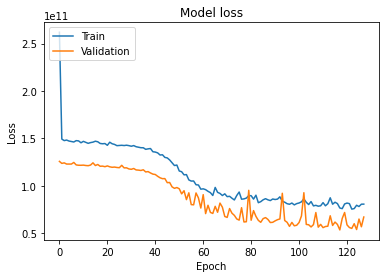

In [19]:
history = nn_grid_search_result.best_estimator_.model.history.history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
nn_pred = nn_grid_search_model.predict(test_X)

#### Metrics for the neural networks model

In [21]:
print(sqrt(MSE(test_y, nn_pred)))
print(MAE(test_y, nn_pred))
print(r2_score(test_y, nn_pred))

231494.7290606255
115050.83856384491
0.7585615659190832


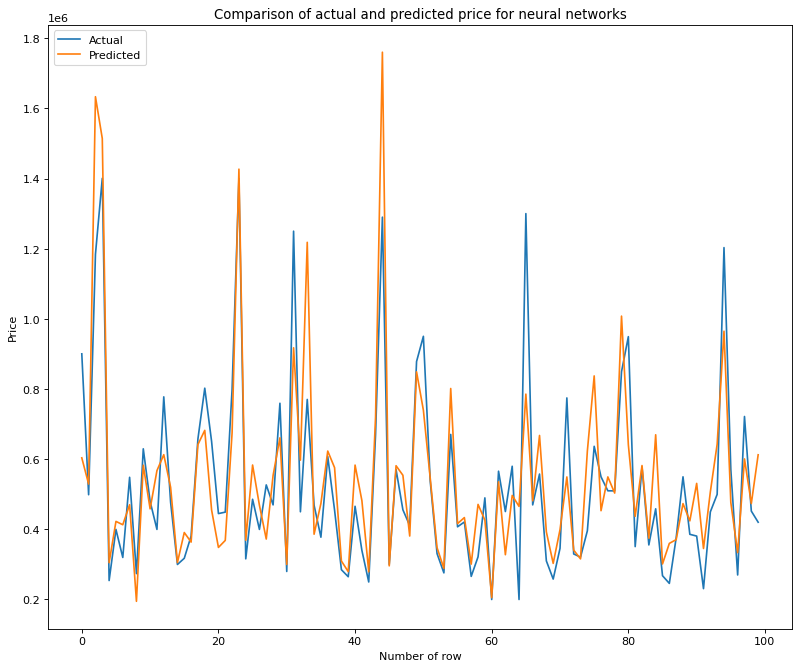

In [22]:
figure(figsize=(12, 10), dpi=80)
plt.plot(list(range(len(test_y[:100].values))), test_y[:100])
plt.plot(list(range(len(test_y[:100].values))), nn_pred[:100])
plt.title('Comparison of actual and predicted price for neural networks')
plt.ylabel('Price')
plt.xlabel('Number of row')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()